In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')
import galpy
from galpy.util import coords
from galpy.potential import IsochronePotential
from galpy.actionAngle import actionAngleIsochrone
# from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleStaeckel
from galpy.actionAngle import estimateDeltaStaeckel
from astropy.io import fits
import tqdm
from galpy.orbit import Orbit
from galpy.potential.mwpotentials import McMillan17
from galpy.util.conversion import get_physical
from galpy.actionAngle import UnboundError


A new version of galpy (1.9.2) is available, please upgrade using pip/conda/... to get the latest features and bug fixes!


In [2]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
# f.keys() # this would list all the APOGEE IDs, including doubles for half-integer bins
median_knot_probability = []
median_bar_probability = []
median_disc_probability = []
std_knot_probability = []
std_bar_probability = []
std_disc_probability = []
all_knot_probability = []
all_bar_probability = []
all_disc_probability = []
RxyzL = []


for key in tqdm.tqdm_notebook(f.keys()):
    median_knot_probability.append(np.nanmedian(f[key][:,2]))
    median_bar_probability.append(np.nanmedian(f[key][:,1]))
    median_disc_probability.append(np.nanmedian(f[key][:,0]))
    std_knot_probability.append(np.nanstd(f[key][:,2]))
    std_bar_probability.append(np.nanstd(f[key][:,1]))
    std_disc_probability.append(np.nanstd(f[key][:,0]))
    all_knot_probability.append((f[key][:,2]))
    all_bar_probability.append((f[key][:,1]))
    all_disc_probability.append((f[key][:,0]))
    RxyzL.append(f[key][:,3][:7])
f.close() # don't forget to close the file!


  0%|          | 0/32489 [00:00<?, ?it/s]

In [3]:
mask_knot = (np.array(median_knot_probability)>0.5)&(np.array(std_knot_probability)<0.15)
mask_bar = (np.array(median_bar_probability)>0.85)&(np.array(std_bar_probability)<0.15)
mask_disc = (np.array(median_disc_probability)>0.85)&(np.array(std_disc_probability)<0.15)

In [4]:
RxyzL_ = np.array(RxyzL)

In [5]:
R = RxyzL_[:,0]
x = RxyzL_[:,1]
y = RxyzL_[:,2]
z = RxyzL_[:,3]
Lx = RxyzL_[:,4]
Ly = RxyzL_[:,5]
Lz = RxyzL_[:,6]

In [6]:
print(len(RxyzL_[mask_knot]))
print(len(RxyzL_[mask_bar]))
print(len(RxyzL_[mask_disc]))

636
3339
20514


In [7]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
apo_ids = []
for key in tqdm.tqdm_notebook(f.keys()):
    new_key = key.replace("*", "")
    apo_ids.append(new_key)
f.close() # don't forget to close the file!


  0%|          | 0/32489 [00:00<?, ?it/s]

In [8]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
apo_ids2 = []
for key in tqdm.tqdm_notebook(f.keys()):
    if '*' in key:
        pass
    else:
        apo_ids2.append(key)
f.close() # don't forget to close the file!
     

  0%|          | 0/32489 [00:00<?, ?it/s]

In [9]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
apo_ids3 = []
for key in tqdm.tqdm_notebook(f.keys()):
    apo_ids3.append(key)
f.close() # don't forget to close the file!
     


  0%|          | 0/32489 [00:00<?, ?it/s]

In [10]:
print(len(apo_ids3))
print(len(apo_ids2))
# print(len(data_all))

32489
18271


In [11]:
mask_u = np.isin(apo_ids3,apo_ids2)


In [12]:
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/table_centroids.fits'
tb = fits.open(path)
data = tb[1].data 

In [13]:
mask_cen_knot = np.where(data['comp']=='knot')
mask_cen_bar = np.where(data['comp']=='bar')
mask_cen_disc = np.where(data['comp']=='disc')


(-1500.0, 500.0)

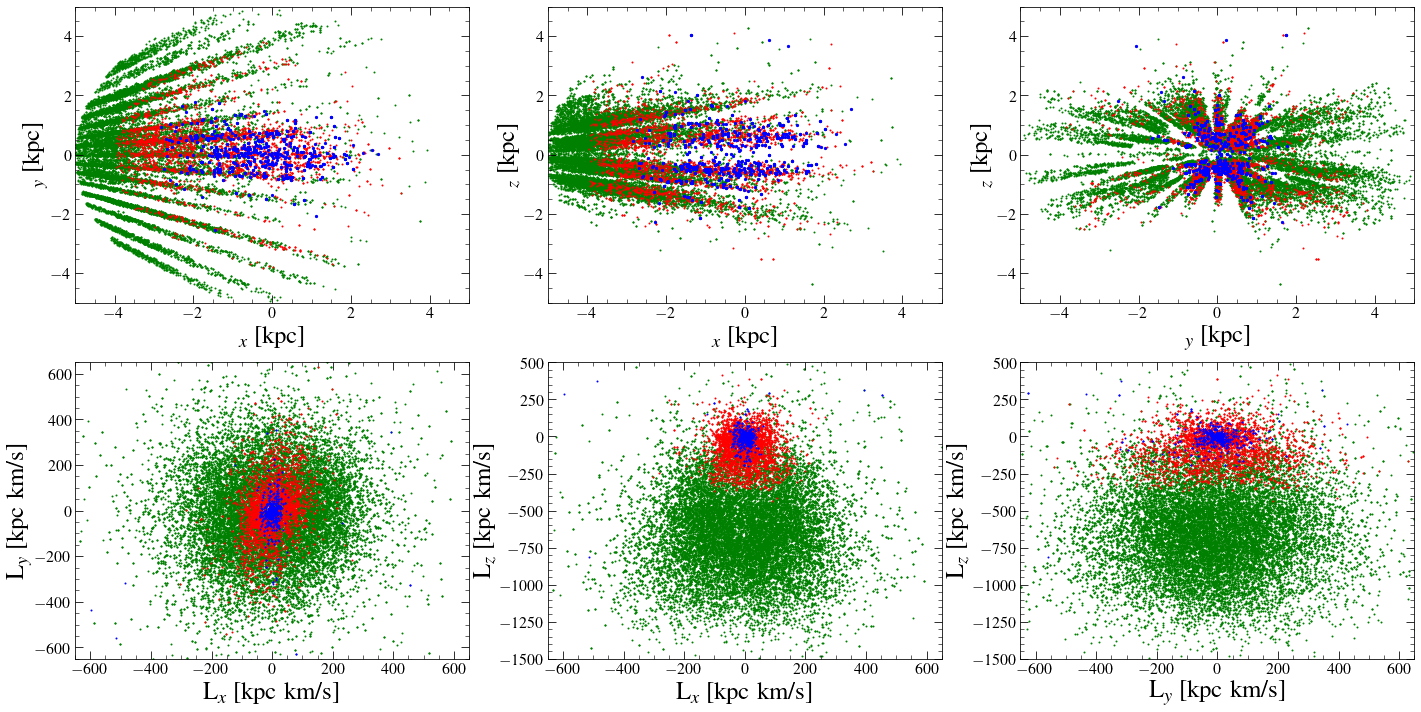

In [ ]:
plt.figure(figsize=(24,12),facecolor='white')

plt.subplot(2,3,1)
plt.scatter(x[mask_disc],y[mask_disc],s=1,c='g')
plt.scatter(x[mask_bar],y[mask_bar],s=1,c='r')
plt.scatter(x[mask_knot],y[mask_knot],s=5,c='b')
plt.xlabel(r'$_{x}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{y}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(2,3,2)
plt.scatter(x[mask_disc],z[mask_disc],s=1,c='g')
plt.scatter(x[mask_bar],z[mask_bar],s=1,c='r')
plt.scatter(x[mask_knot],z[mask_knot],s=5,c='b')
plt.xlabel(r'$_{x}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{z}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(2,3,3)
plt.scatter(y[mask_disc],z[mask_disc],s=1,c='g')
plt.scatter(y[mask_bar],z[mask_bar],s=1,c='r')
plt.scatter(y[mask_knot],z[mask_knot],s=5,c='b')
plt.xlabel(r'$_{y}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{z}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)


plt.subplot(2,3,4)
plt.scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='g')
plt.scatter(Lx[mask_bar],Ly[mask_bar],s=1,c='r')
plt.scatter(Lx[mask_knot],Ly[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(2,3,5)
plt.scatter(Lx[mask_disc],Lz[mask_disc],s=1,c='g')
plt.scatter(Lx[mask_bar],Lz[mask_bar],s=1,c='r')
plt.scatter(Lx[mask_knot],Lz[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(2,3,6)
plt.scatter(Ly[mask_disc],Lz[mask_disc],s=1,c='g')
plt.scatter(Ly[mask_bar],Lz[mask_bar],s=1,c='r')
plt.scatter(Ly[mask_knot],Lz[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)


(-1500.0, 500.0)

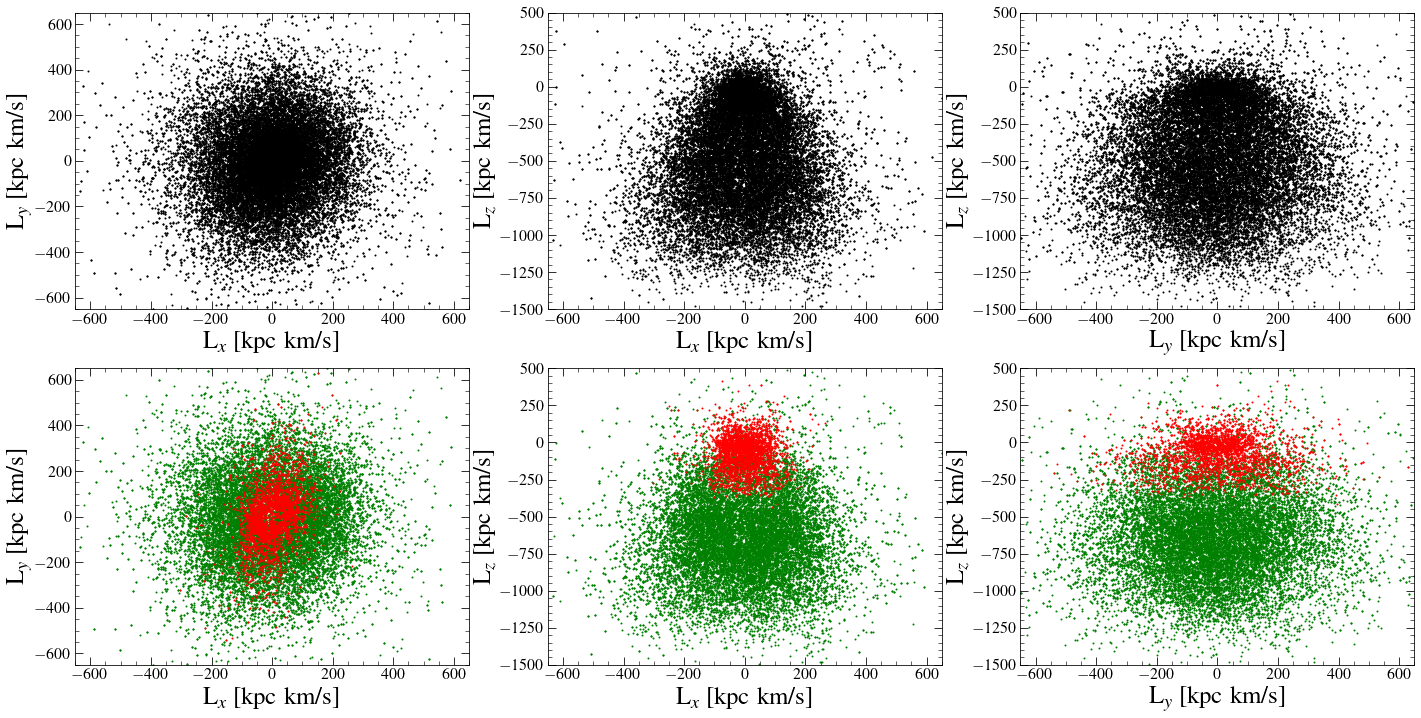

In [15]:
plt.figure(figsize=(24,12),facecolor='white')

plt.subplot(2,3,1)
plt.scatter(Lx,Ly,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(2,3,2)
plt.scatter(Lx,Lz,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(2,3,3)
plt.scatter(Ly,Lz,s=1,c='k')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)




plt.subplot(2,3,4)
plt.scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='g')
plt.scatter(Lx[mask_bar],Ly[mask_bar],s=1,c='r')
# plt.scatter(Lx[mask_knot],Ly[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(2,3,5)
plt.scatter(Lx[mask_disc],Lz[mask_disc],s=1,c='g')
plt.scatter(Lx[mask_bar],Lz[mask_bar],s=1,c='r')
# plt.scatter(Lx[mask_knot],Lz[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(2,3,6)
plt.scatter(Ly[mask_disc],Lz[mask_disc],s=1,c='g')
plt.scatter(Ly[mask_bar],Lz[mask_bar],s=1,c='r')
# plt.scatter(Ly[mask_knot],Lz[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)





In [ ]:
plt.figure(figsize=(28,6),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(Lx,Ly,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(1,3,2)
plt.scatter(Lx,Lz,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(1,3,3)
plt.scatter(Ly,Lz,s=1,c='k')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)




# plt.subplot(2,3,4)
# plt.scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='g')
# plt.scatter(Lx[mask_bar],Ly[mask_bar],s=1,c='r')
# # plt.scatter(Lx[mask_knot],Ly[mask_knot],s=1,c='b')
# plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
# plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
# plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.xlim(-650,650)
# plt.ylim(-650,650)

# plt.subplot(2,3,5)
# plt.scatter(Lx[mask_disc],Lz[mask_disc],s=1,c='g')
# plt.scatter(Lx[mask_bar],Lz[mask_bar],s=1,c='r')
# # plt.scatter(Lx[mask_knot],Lz[mask_knot],s=1,c='b')
# plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
# plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
# plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.xlim(-650,650)
# plt.ylim(-1500,500)

# plt.subplot(2,3,6)
# plt.scatter(Ly[mask_disc],Lz[mask_disc],s=1,c='g')
# plt.scatter(Ly[mask_bar],Lz[mask_bar],s=1,c='r')
# # plt.scatter(Ly[mask_knot],Lz[mask_knot],s=1,c='b')
# plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
# plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
# plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.xlim(-650,650)
# plt.ylim(-1500,500)





In [ ]:

plt.subplot(1,3,4)
plt.scatter(Lx,Ly,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(1,3,5)
plt.scatter(Lx,Lz,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(1,3,6)
plt.scatter(Ly,Lz,s=1,c='k')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)




In [14]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
#     if x.size != y.size:
#         raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [15]:
path_all = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/4Mike-innergal-bar-gaiadists'
tb_all = fits.open(path_all)
data_all = tb_all[1].data 
print(len(data_all))

21742


In [16]:
def dat_to_galcen(dat,
                  return_rphiz =True,
                  verbose =False,
                  ro = 8.275,  # GRAVITY 2018 value 
                  vo = 220.,   # GRAVITY 2018 value 
                  zo = 0.02,    # Bennet and Bovy 2018 value
                  keys = ['ra', 'dec', 'GAIAEDR3_R_MED_PHOTOGEO', 'pmra', 'pmdec', 'VHELIO_AVG'],
                  #cov_keys = [dat['pmra_error_1'],dat['pmdec_error_1'],dat['SH_weighted_diststd'],dat['VERR_1']],
                  parallax = False):
    vxvv = np.dstack([dat[keys[i]] for i in range(len(keys))])[0]
    ra, dec= vxvv[:,0], vxvv[:,1]
    lb= coords.radec_to_lb(ra,dec,degree=True, epoch=None)
    pmra, pmdec= vxvv[:,3], vxvv[:,4]
    pmllpmbb= coords.pmrapmdec_to_pmllpmbb(pmra,pmdec,ra,dec,degree=True)
    d, vlos= vxvv[:,2]/1e3, vxvv[:,5]
    if parallax:
        d = 1./d
    rectgal= coords.sphergal_to_rectgal(lb[:,0],lb[:,1],d,vlos,pmllpmbb[:,0], pmllpmbb[:,1],degree=True)
    vsolar= np.array([-11.1,26.5,7.25]) # Values from Ted's halo paper, taken from Schrondich 2010 and adjusted given by the proper motion values for SGR A* by the GRAVITY collaboration. Vx is negative because we adopt the x convention to go in opposite direction
    vsun= np.array([0.,1.,0.,])+vsolar/vo
    X = rectgal[:,0]/ro
    Y = rectgal[:,1]/ro
    Z = rectgal[:,2]/ro
    vx = rectgal[:,3]/vo
    vy = rectgal[:,4]/vo
    vz = rectgal[:,5]/vo
    XYZ = np.dstack([X, Y, Z])[0]
    vxyz = np.dstack([vx,vy,vz])[0]
    Rpz = coords.XYZ_to_galcencyl(XYZ[:,0],XYZ[:,1],XYZ[:,2],Zsun=zo/ro)
    vRvTvz = coords.vxvyvz_to_galcencyl(vxyz[:,0], vxyz[:,1], vxyz[:,2], Rpz[:,0], Rpz[:,1], Rpz[:,2],
                                                                    vsun=vsun,
                                                                    Xsun=1.,
                                                                    Zsun=zo/ro,
                                                                    galcen=True)
    return XYZ, vxyz, Rpz, vRvTvz

In [17]:
xyz,vxyz,Rpz,vRvTvz = dat_to_galcen(data_all)

In [18]:
Rgal = Rpz[:,0]*8.275
Zgal = Rpz[:,2]*8.275

rads = np.sqrt(Rgal**2+Zgal**2)

NameError: name 'confidence_ellipse' is not defined

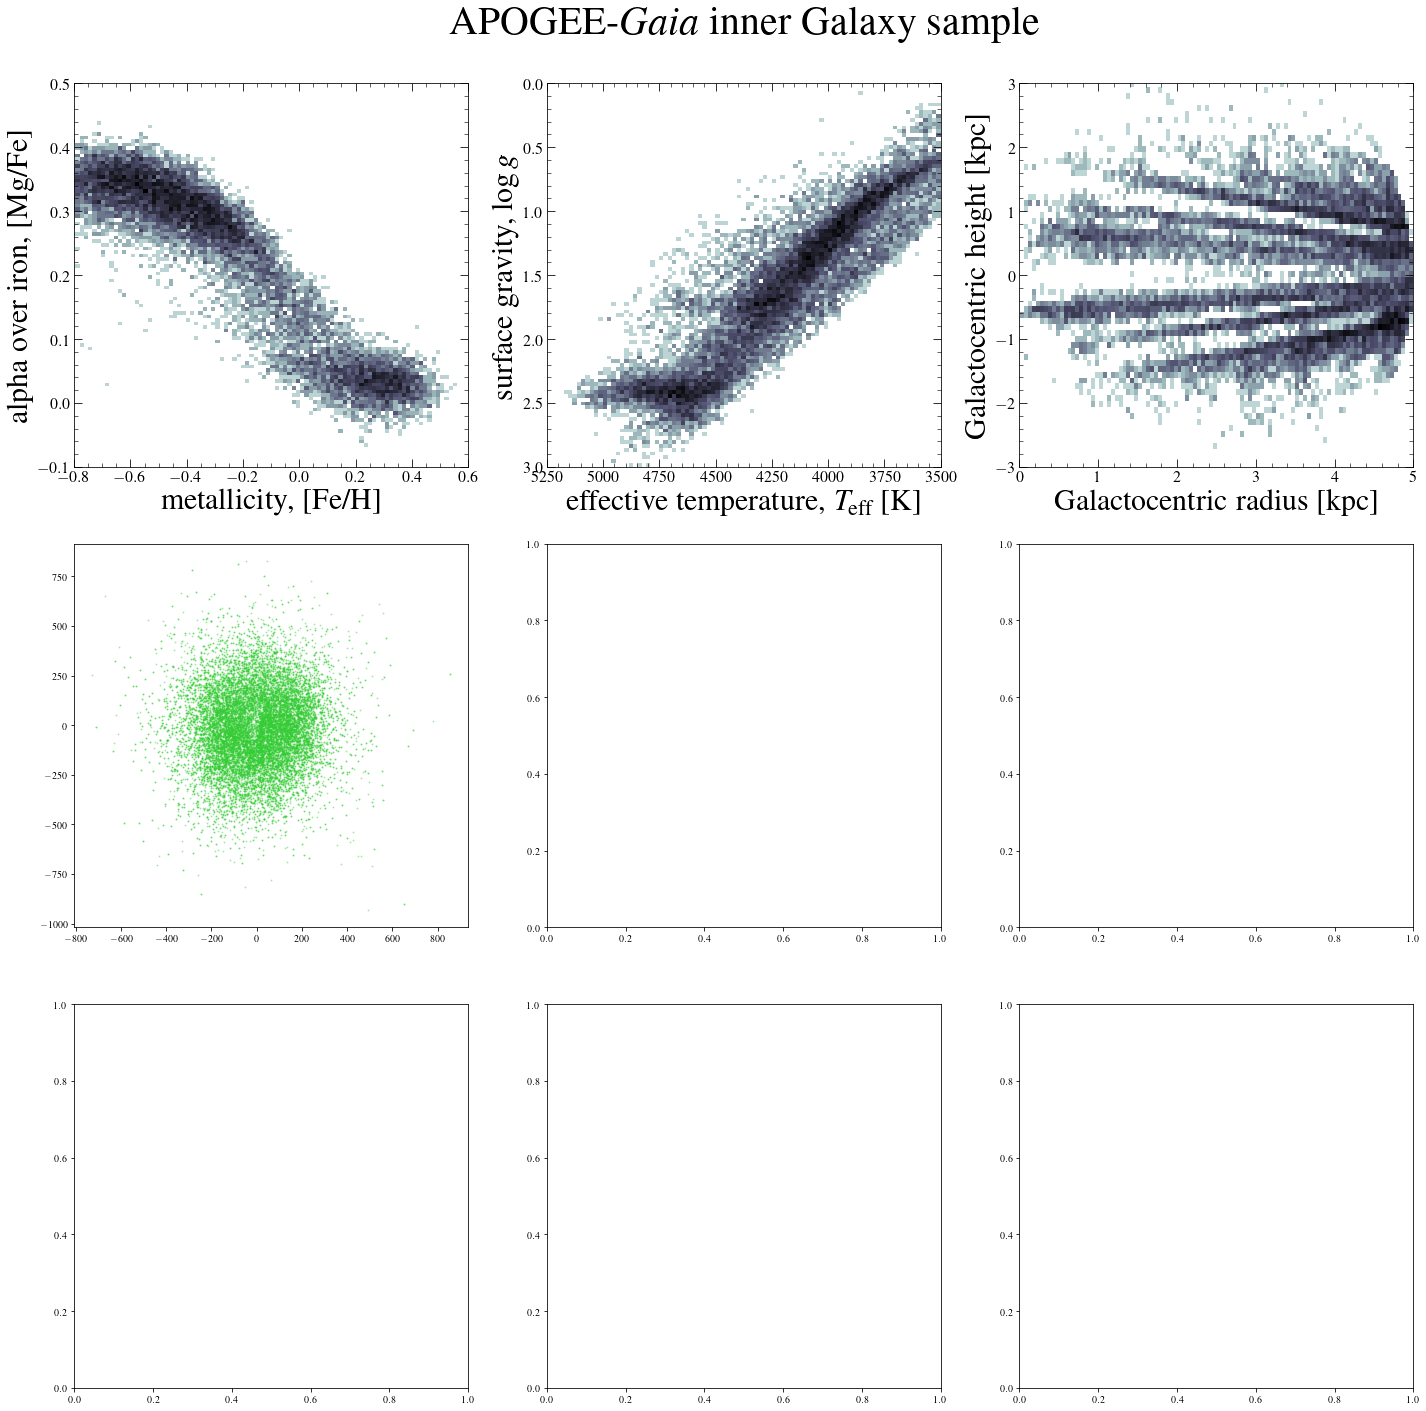

In [21]:
from matplotlib.colors import LogNorm
fig, ax_nstd = plt.subplots(3,3, figsize=(24,24),facecolor='white')

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5


# Mg-fe
ax_nstd[0,0].hist2d(data_all['FE_H'][data_all['MG_FE']>-10],data_all['MG_FE'][data_all['MG_FE']>-10],bins=200,cmap='bone_r',norm=LogNorm())
ax_nstd[0,0].set_xlabel(r'metallicity, [Fe/H]',fontsize=30)
ax_nstd[0,0].set_ylabel(r'alpha over iron, [Mg/Fe]',fontsize=30)
ax_nstd[0,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,0].minorticks_on()
ax_nstd[0,0].set_xlim(-0.8,0.6)
ax_nstd[0,0].set_ylim(-0.1,0.5)
# cb = ax_nstd[0,0].colorbar(orientation='horizontal',location='top')
# cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
# cb.ax.tick_params(labelsize=20)
# cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,orientation='horizontal',location='top')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
# cbar.ax.tick_params(labelsize=20,pad=1)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')


# teff-logg
ax_nstd[0,1].set_title('APOGEE-$Gaia$ inner Galaxy sample',fontsize=40,pad=50)
ax_nstd[0,1].hist2d(data_all['TEFF'][data_all['LOGG']>-10],data_all['LOGG'][data_all['LOGG']>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[0,1].set_xlabel(r'effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=30)
ax_nstd[0,1].set_ylabel(r'surface gravity, $\log g$',fontsize=30)
ax_nstd[0,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,1].minorticks_on()
ax_nstd[0,1].set_xlim(5250,3500)
ax_nstd[0,1].set_ylim(3,0.)

# R-z

ax_nstd[0,2].hist2d(Rgal[Zgal>-10],Zgal[Zgal>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[0,2].set_xlabel(r'Galactocentric radius [kpc]',fontsize=30)
ax_nstd[0,2].set_ylabel(r'Galactocentric height [kpc]',fontsize=30)
ax_nstd[0,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,2].minorticks_on()
ax_nstd[0,2].set_xlim(0.,5)
ax_nstd[0,2].set_ylim(-3,3)



# lx-ly
ax_nstd[1,0].scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lx[mask_disc],Ly[mask_disc], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,0].scatter(Lx[mask_bar],Ly[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Lx[mask_bar],Ly[mask_bar], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,0].scatter(Lx[mask_knot],Ly[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Lx[mask_knot],Ly[mask_knot], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,0].set_xlabel(r'Galactocentric L$_{x}$ [kpc km/s]',fontsize=30)
ax_nstd[1,0].set_ylabel(r'Galactocentric L$_{y}$ [kpc km/s]',fontsize=30)
ax_nstd[1,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,0].minorticks_on()
ax_nstd[1,0].set_xlim(-600,600)
ax_nstd[1,0].set_ylim(-600,600)

# lx-lz
ax_nstd[1,1].scatter(Lx[mask_disc],Lz[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lx[mask_disc],Lz[mask_disc], ax_nstd[1,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,1].scatter(Lx[mask_bar],Lz[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Lx[mask_bar],Lz[mask_bar], ax_nstd[1,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,1].scatter(Lx[mask_knot],Lz[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Lx[mask_knot],Lz[mask_knot], ax_nstd[1,1], n_std=2,
                   label=r'Knot', edgecolor='indigo',lw=4)
ax_nstd[1,1].set_xlabel(r'Galactocentric L$_{x}$ [kpc km/s]',fontsize=30)
ax_nstd[1,1].set_ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=30)
ax_nstd[1,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[1,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,1].minorticks_on()
ax_nstd[1,1].set_xlim(-600,600)
ax_nstd[1,1].set_ylim(-1500,500)

# ly-lz
ax_nstd[1,2].scatter(Ly[mask_disc],Lz[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Ly[mask_disc],Lz[mask_disc], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,2].scatter(Ly[mask_bar],Lz[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Ly[mask_bar],Lz[mask_bar], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,2].scatter(Ly[mask_knot],Lz[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Ly[mask_knot],Lz[mask_knot], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,2].set_xlabel(r'Galactocentric L$_{y}$ [kpc km/s]',fontsize=30)
ax_nstd[1,2].set_ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=30)
ax_nstd[1,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,2].minorticks_on()
ax_nstd[1,2].set_xlim(-600,600)
ax_nstd[1,2].set_ylim(-1500,500)


# x-y
ax_nstd[2,0].scatter(x[mask_disc],y[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(x[mask_disc],y[mask_disc], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,0].scatter(x[mask_bar],y[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(x[mask_bar],y[mask_bar], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,0].scatter(x[mask_knot],y[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(x[mask_knot],y[mask_knot], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,0].set_xlabel(r'Galactocentric ${x}$ [kpc]',fontsize=30)
ax_nstd[2,0].set_ylabel(r'Galactocentric ${y}$ [kpc]',fontsize=30)
ax_nstd[2,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,0].minorticks_on()
ax_nstd[2,0].set_xlim(-5,5)
ax_nstd[2,0].set_ylim(-5,5)

# x-z
ax_nstd[2,1].scatter(x[mask_disc],z[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(x[mask_disc],z[mask_disc], ax_nstd[2,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,1].scatter(x[mask_bar],z[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(x[mask_bar],z[mask_bar], ax_nstd[2,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,1].scatter(x[mask_knot],z[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(x[mask_knot],z[mask_knot], ax_nstd[2,1], n_std=2,
                   label=r'Knot', edgecolor='indigo',lw=4)
ax_nstd[2,1].set_xlabel(r'Galactocentric ${x}$ [kpc]',fontsize=30)
ax_nstd[2,1].set_ylabel(r'Galactocentric ${z}$ [kpc]',fontsize=30)
ax_nstd[2,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[2,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,1].minorticks_on()
ax_nstd[2,1].set_xlim(-5,5)
ax_nstd[2,1].set_ylim(-5,5)

# y-z
ax_nstd[2,2].scatter(y[mask_disc],z[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(y[mask_disc],z[mask_disc], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,2].scatter(y[mask_bar],z[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(y[mask_bar],z[mask_bar], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,2].scatter(y[mask_knot],z[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(y[mask_knot],z[mask_knot], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,2].set_xlabel(r'Galactocentric ${y}$ [kpc]',fontsize=30)
ax_nstd[2,2].set_ylabel(r'Galactocentric ${z}$ [kpc]',fontsize=30)
ax_nstd[2,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,2].minorticks_on()
ax_nstd[2,2].set_xlim(-5,5)
ax_nstd[2,2].set_ylim(-5,5)

plt.subplots_adjust(wspace=0.25,hspace=0.25)
# plt.savefig('../plots-paper/summary.pdf',dpi=600,fmt='pdf', rasterized=True)
plt.show()


In [19]:
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/table_centroids.fits'
tb = fits.open(path)
data = tb[1].data 

In [20]:
mask_disc_cen = np.where(data['comp']=='disc')
mask_knot_cen = np.where(data['comp']=='knot')
mask_bar_cen = np.where(data['comp']=='bar')

In [21]:
lx_cen = data['Lx']
lx_std_cen = (data['Lx+']-data['Lx-'])/2
ly_cen = data['Ly']
lz_cen = data['Lz']


In [22]:
mask_knot = (np.array(median_knot_probability)>0.5)&(np.array(std_knot_probability)<0.15 )
mask_bar = (np.array(median_bar_probability)>0.8)&(np.array(std_bar_probability)<0.1 )
mask_disc = (np.array(median_disc_probability)>0.8)&(np.array(std_disc_probability)<0.1)

In [ ]:
from matplotlib.colors import LogNorm
fig, ax_nstd = plt.subplots(3,3, figsize=(24,24),facecolor='white')
fig.suptitle('Position and angular momentum decomposition of the inner Galaxy',fontsize=40,x=0.51,y=0.925)

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability),color='limegreen',histtype='step',lw=3,label='Disc',density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability),color='limegreen',alpha=0.3,density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability),color='r',histtype='step',lw=3,label='Bar',density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability),color='r',alpha=0.3,density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_knot_probability),color='indigo',histtype='step',lw=3,label='Knot',density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_knot_probability),color='indigo',alpha=0.3,density=True)
ax_nstd[0,0].set_xlabel(r'Galactocentric L$_{x}$ [kpc km s$^{-1}$]',fontsize=30,labelpad=5)
#ax_nstd[0,0]plt.legend(loc='upper left',fontsize=18,frameon=False)
ax_nstd[0,0].set_ylabel(r'Normalised Frequency',fontsize=30,labelpad=5)
ax_nstd[0,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,0].minorticks_on()
ax_nstd[0,0].set_xlim(-600,600)
ax_nstd[0,0].set_ylim(0,0.012)


# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability),color='limegreen',alpha=0.3,density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability),color='limegreen',histtype='step',lw=3,label='Disc',density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability),color='r',histtype='step',lw=3,label='Bar',density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability),color='r',alpha=0.3,density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_knot_probability),color='indigo',histtype='step',lw=3,label='Knot',density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_knot_probability),color='indigo',alpha=0.3,density=True)
ax_nstd[0,1].set_xlabel(r'Galactocentric L$_{y}$ [kpc km s$^{-1}$]',fontsize=30,labelpad=5)
ax_nstd[0,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
# plt.ylabel(r'Normalised Frequency',fontsize=25)
ax_nstd[0,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,1].minorticks_on()
ax_nstd[0,1].set_xlim(-600,600)
ax_nstd[0,1].set_ylim(0,0.01)


# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
ax_nstd[0,2].hist(-Lz,bins=np.linspace(-500,1500,51),weights=np.array(median_disc_probability),color='limegreen',histtype='step',lw=3,label='Disc',density=True)
ax_nstd[0,2].hist(-Lz,bins=np.linspace(-500,1500,51),weights=np.array(median_disc_probability),color='limegreen',alpha=0.3,density=True)
ax_nstd[0,2].hist(-Lz,bins=np.linspace(-500,1500,51),weights=np.array(median_bar_probability),color='r',alpha=0.3,density=True)
ax_nstd[0,2].hist(-Lz,bins=np.linspace(-500,1500,51),weights=np.array(median_bar_probability),color='r',histtype='step',lw=3,label='Bar',density=True)
ax_nstd[0,2].set_xlabel(r'Galactocentric L$_{z}$ [kpc km s$^{-1}$]',fontsize=30,labelpad=5)
ax_nstd[0,2].hist(-Ly,bins=np.linspace(-500,1500,51),weights=np.array(median_knot_probability),color='indigo',histtype='step',lw=3,label='Knot',density=True)
ax_nstd[0,2].hist(-Ly,bins=np.linspace(-500,1500,51),weights=np.array(median_knot_probability),color='indigo',alpha=0.3,density=True)
# plt.legend(loc='upper right',fontsize=18,frameon=False)
# plt.ylabel(r'Normalised Frequency',fontsize=25)
ax_nstd[0,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,2].minorticks_on()
ax_nstd[0,2].set_xlim(-500,1500)
ax_nstd[0,2].set_ylim(0,0.01)

# lx-ly
ax_nstd[1,0].vlines(0,-600,600,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,0].hlines(0,-600,600,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,0].scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lx[mask_disc],Ly[mask_disc], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,0].scatter(Lx[mask_bar],Ly[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Lx[mask_bar],Ly[mask_bar], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,0].scatter(Lx[mask_knot],Ly[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Lx[mask_knot],Ly[mask_knot], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,0].set_xlabel(r'Galactocentric L$_{x}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,0].set_ylabel(r'Galactocentric L$_{y}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,0].minorticks_on()
ax_nstd[1,0].set_xlim(-600,600)
ax_nstd[1,0].set_ylim(-600,600)


# lx-lz
ax_nstd[1,1].vlines(0,-1500,1500,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,1].hlines(0,-600,600,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,1].scatter(Lx[mask_disc],-Lz[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lx[mask_disc],-Lz[mask_disc], ax_nstd[1,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,1].scatter(Lx[mask_bar],-Lz[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Lx[mask_bar],-Lz[mask_bar], ax_nstd[1,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,1].scatter(Lx[mask_knot],-Lz[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Lx[mask_knot],-Lz[mask_knot], ax_nstd[1,1], n_std=2,
                   label=r'Knot', edgecolor='indigo',lw=4)
ax_nstd[1,1].set_xlabel(r'Galactocentric L$_{x}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,1].set_ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[1,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,1].minorticks_on()
ax_nstd[1,1].set_xlim(-600,600)
ax_nstd[1,1].set_ylim(-1500,1500)

# ly-lz
ax_nstd[1,2].vlines(0,-1500,1500,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,2].hlines(0,-600,600,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,2].scatter(Ly[mask_disc],-Lz[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Ly[mask_disc],-Lz[mask_disc], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,2].scatter(Ly[mask_bar],-Lz[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Ly[mask_bar],-Lz[mask_bar], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,2].scatter(Ly[mask_knot],-Lz[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Ly[mask_knot],-Lz[mask_knot], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,2].set_xlabel(r'Galactocentric L$_{y}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,2].set_ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,2].minorticks_on()
ax_nstd[1,2].set_xlim(-600,600)
ax_nstd[1,2].set_ylim(-1500,1500)


# x-y
ax_nstd[2,0].vlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,0].hlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,0].scatter(x[mask_disc],y[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(x[mask_disc],y[mask_disc], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,0].scatter(x[mask_bar],y[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(x[mask_bar],y[mask_bar], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,0].scatter(x[mask_knot],y[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(x[mask_knot],y[mask_knot], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,0].set_xlabel(r'Galactocentric ${x}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,0].set_ylabel(r'Galactocentric ${y}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,0].minorticks_on()
ax_nstd[2,0].set_xlim(-5,5)
ax_nstd[2,0].set_ylim(-5,5)

# x-z
ax_nstd[2,1].vlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,1].hlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,1].scatter(x[mask_disc],z[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(x[mask_disc],z[mask_disc], ax_nstd[2,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,1].scatter(x[mask_bar],z[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(x[mask_bar],z[mask_bar], ax_nstd[2,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,1].scatter(x[mask_knot],z[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(x[mask_knot],z[mask_knot], ax_nstd[2,1], n_std=2,
                   label=r'Knot', edgecolor='indigo',lw=4)
ax_nstd[2,1].set_xlabel(r'Galactocentric ${x}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,1].set_ylabel(r'Galactocentric ${z}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[2,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,1].minorticks_on()
ax_nstd[2,1].set_xlim(-5,5)
ax_nstd[2,1].set_ylim(-5,5)

# y-z
ax_nstd[2,2].vlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,2].hlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,2].scatter(y[mask_disc],z[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(y[mask_disc],z[mask_disc], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,2].scatter(y[mask_bar],z[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(y[mask_bar],z[mask_bar], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,2].scatter(y[mask_knot],z[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(y[mask_knot],z[mask_knot], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,2].set_xlabel(r'Galactocentric ${y}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,2].set_ylabel(r'Galactocentric ${z}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,2].minorticks_on()
ax_nstd[2,2].set_xlim(-5,5)
ax_nstd[2,2].set_ylim(-5,5)

plt.subplots_adjust(wspace=0.25,hspace=0.25)
# plt.savefig('../plots-paper/summary.pdf',dpi=600,fmt='pdf', rasterized=True, bbox_inches = 'tight')
plt.show()


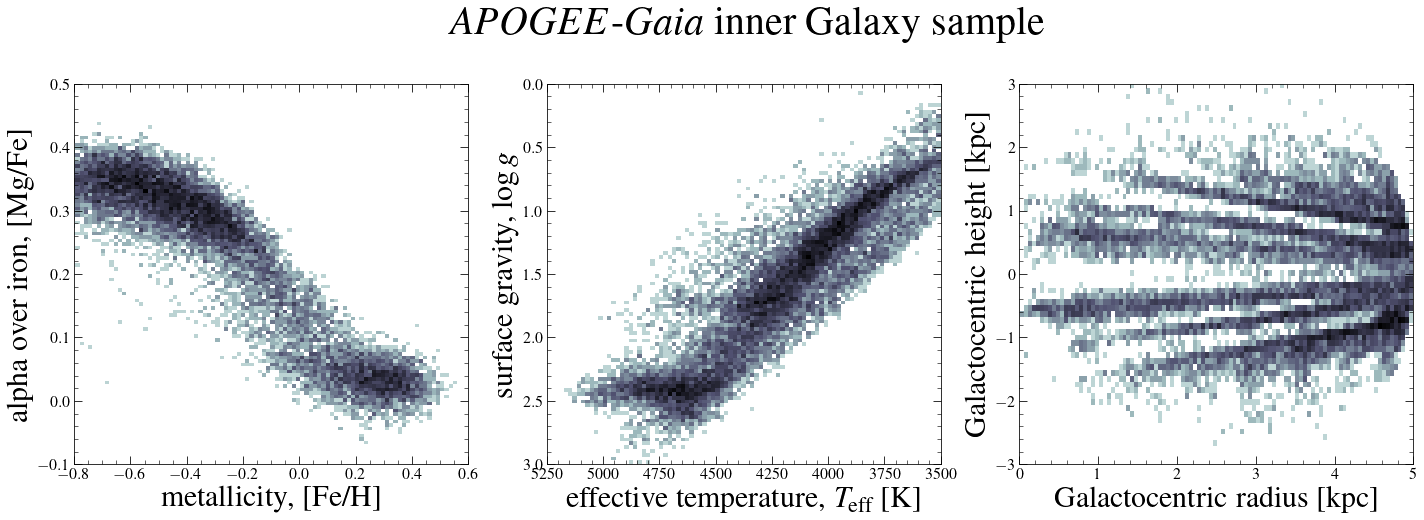

In [25]:
from matplotlib.colors import LogNorm
fig, ax_nstd = plt.subplots(1,3, figsize=(24,7),facecolor='white')

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5


# Mg-fe
ax_nstd[0].hist2d(data_all['FE_H'][data_all['MG_FE']>-10],data_all['MG_FE'][data_all['MG_FE']>-10],bins=200,cmap='bone_r',norm=LogNorm())
ax_nstd[0].set_xlabel(r'metallicity, [Fe/H]',fontsize=30)
ax_nstd[0].set_ylabel(r'alpha over iron, [Mg/Fe]',fontsize=30)
ax_nstd[0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0].minorticks_on()
ax_nstd[0].set_xlim(-0.8,0.6)
ax_nstd[0].set_ylim(-0.1,0.5)
# cb = ax_nstd[0,0].colorbar(orientation='horizontal',location='top')
# cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
# cb.ax.tick_params(labelsize=20)
# cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,orientation='horizontal',location='top')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
# cbar.ax.tick_params(labelsize=20,pad=1)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')


# teff-logg
ax_nstd[1].set_title('$APOGEE$-$Gaia$ inner Galaxy sample',fontsize=40,pad=50)
ax_nstd[1].hist2d(data_all['TEFF'][data_all['LOGG']>-10],data_all['LOGG'][data_all['LOGG']>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[1].set_xlabel(r'effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=30)
ax_nstd[1].set_ylabel(r'surface gravity, $\log g$',fontsize=30)
ax_nstd[1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1].minorticks_on()
ax_nstd[1].set_xlim(5250,3500)
ax_nstd[1].set_ylim(3,0.)

# R-z

ax_nstd[2].hist2d(Rgal[Zgal>-10],Zgal[Zgal>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[2].set_xlabel(r'Galactocentric radius [kpc]',fontsize=30)
ax_nstd[2].set_ylabel(r'Galactocentric height [kpc]',fontsize=30)
ax_nstd[2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2].minorticks_on()
ax_nstd[2].set_xlim(0.,5)
ax_nstd[2].set_ylim(-3,3)

plt.savefig('../plots-paper/data.pdf',dpi=600,fmt='pdf', rasterized=True, bbox_inches = 'tight')




# Plot the $\alpha$-Fe plane

as we have chains for the probabilities of every star, we will compute the alpha-Fe plane $\times$ the number of chains, weighted by the probabilities, and then take the average

In [23]:
def get_2dhist(xs,ys,weights):
    nbins = 20
    # compute the weighted 2d histogram
    xlin = np.linspace(-0.8,0.8,51)
    ylin = np.linspace(-0.2,0.5,51)
    hist, xedges, yedges = np.histogram2d(xs, ys, bins=[xlin,ylin], weights=weights)
    extent = [xedges[0],xedges[-1], yedges[0], yedges[-1]]
    hist = np.rot90(hist)
    return hist,xedges,yedges



In [24]:
mask_un = np.isin(data_all['APOGEE_ID'],apo_ids2)
print(len(data_all[mask_un]))
print(len(data_all['APOGEE_ID']))

18271
21742


(array([0.0025364 , 0.01308583, 0.0316019 , 0.05390795, 0.1599387 ,
        0.26506586, 0.33722005, 0.44225099, 0.50661344, 0.54945312,
        0.52630857, 0.62148244, 0.43286116, 0.37210452, 0.38193097,
        0.76917324, 0.81820714, 0.26878479, 0.0882137 , 0.03196013]),
 array([6.28210604e-04, 1.50492564e-01, 3.00356925e-01, 4.50221270e-01,
        6.00085616e-01, 7.49949992e-01, 8.99814308e-01, 1.04967868e+00,
        1.19954300e+00, 1.34940743e+00, 1.49927175e+00, 1.64913607e+00,
        1.79900050e+00, 1.94886482e+00, 2.09872913e+00, 2.24859357e+00,
        2.39845777e+00, 2.54832220e+00, 2.69818664e+00, 2.84805083e+00,
        2.99791527e+00]),
 [<matplotlib.patches.Polygon at 0x2c31bc670>])

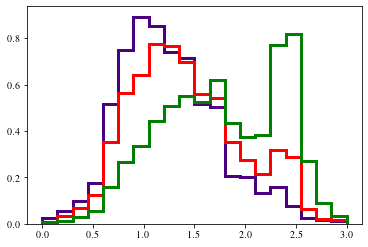

In [27]:
plt.hist(data_all['LOGG'][mask_un],20,weights=np.array(median_knot_probability)[mask_u],color='indigo',histtype='step',lw=3,label='Knot/box',density=True)
plt.hist(data_all['LOGG'][mask_un],20,weights=np.array(median_bar_probability)[mask_u],color='r',histtype='step',lw=3,label='Knot/box',density=True)
plt.hist(data_all['LOGG'][mask_un],20,weights=np.array(median_disc_probability)[mask_u],color='g',histtype='step',lw=3,label='Knot/box',density=True)


In [31]:
mask_logg = (data_all['LOGG'][mask_un]>0.5)&(data_all['LOGG'][mask_un]<1.5)&(rads[mask_un]<3)
# &(rads[mask_un]<3)

knot_probs = np.array(all_knot_probability)[mask_u][mask_logg].T
bar_probs = np.array(all_bar_probability)[mask_u][mask_logg].T
disc_probs = np.array(all_disc_probability)[mask_u][mask_logg].T

hist_knot = np.zeros((len(knot_probs),50,50))
hist_bar = np.zeros((len(bar_probs),50,50))
hist_disc = np.zeros((len(disc_probs),50,50))

for indx, i in enumerate(knot_probs):
    hist_knot[indx],xedges_knot,yedges_knot = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],i)
    hist_bar[indx],xedges_bar,yedges_bar = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],bar_probs[indx])
    hist_disc[indx],xedges_disc,yedges_disc = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],disc_probs[indx])


In [25]:
def get_2dhist_solar(xs,ys):
    nbins = 20
    # compute the weighted 2d histogram
    xlin = np.linspace(-0.8,0.8,51)
    ylin = np.linspace(-0.2,0.5,51)
    hist, xedges, yedges = np.histogram2d(xs, ys, bins=[xlin,ylin])
    extent = [xedges[0],xedges[-1], yedges[0], yedges[-1]]
    hist = np.rot90(hist)
    return hist,xedges,yedges


In [26]:
path_all2 = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb_all2 = fits.open(path_all2)
data_todo = tb_all2[1].data 


In [27]:
Lx_todo = np.load('/Users/dhortadarrington/Documents/Projects/accreted-systems/samples/Lx_full_dr17.npy',allow_pickle=True)
Ly_todo = np.load('/Users/dhortadarrington/Documents/Projects/accreted-systems/samples/Ly_full_dr17.npy',allow_pickle=True)
Lz_todo = np.load('/Users/dhortadarrington/Documents/Projects/accreted-systems/samples/Lz_full_dr17.npy',allow_pickle=True)
print(len(Lx_todo),len(data_todo))


733900 733900


In [28]:
mask_solar_1 = np.load('/Users/dhortadarrington/Documents/Projects/mw-bar/sav/mask_solar.npy',allow_pickle=True)
mask_solar = mask_solar_1&(data_todo['LOGG']>0.5)&(data_todo['LOGG']<1.5) 
# &(np.abs(data_todo['Zgal']*8.178)<0.3)
hist_solar,xedges,yedges = get_2dhist_solar(data_todo['FE_H'][mask_solar],data_todo['MG_FE'][mask_solar])


In [33]:
mask_logg = (data_all['LOGG'][mask_un]>0.5)&(data_all['LOGG'][mask_un]<1.5)&(rads[mask_un]<3)
# &(np.abs(Zgal[mask_un])<0.3)

knot_probs = np.array(all_knot_probability)[mask_u][mask_logg].T
bar_probs = np.array(all_bar_probability)[mask_u][mask_logg].T
disc_probs = np.array(all_disc_probability)[mask_u][mask_logg].T

hist_knot_1d = np.zeros((len(knot_probs),10))
hist_bar_1d = np.zeros((len(bar_probs),10))
hist_disc_1d = np.zeros((len(disc_probs),10))

for indx, i in enumerate(knot_probs):
    hist_knot_1d[indx],binedges_knot = np.histogram(data_all['FE_H'][mask_un][mask_logg],bins= np.linspace(-0.8,0.8,11),weights=i)
    hist_bar_1d[indx],binedges_bar = np.histogram(data_all['FE_H'][mask_un][mask_logg],bins= np.linspace(-0.8,0.8,11),weights=bar_probs[indx])
    hist_disc_1d[indx],binedges_disc = np.histogram(data_all['FE_H'][mask_un][mask_logg],bins= np.linspace(-0.8,0.8,11),weights=disc_probs[indx])
 

In [34]:
print(len(np.array(all_knot_probability)[mask_u][mask_logg]))
print(len(data_all['FE_H'][mask_un][mask_logg]))

3761
3761


In [35]:
print(np.shape(knot_probs))
print(np.shape(data_all['FE_H'][mask_un][mask_logg]))

(20, 3761)
(3761,)


(array([0.23154725, 0.31936119, 0.43140008, 0.67486287, 0.78245051,
        0.74994048, 0.97425933, 1.0638954 , 0.94535464, 1.21186198,
        1.23033195, 1.17152824, 1.5351548 , 1.3623908 , 1.27742666,
        1.29591856, 1.30340044, 1.1401955 , 1.20318269, 1.11742111]),
 array([0.50103652, 0.55098188, 0.60092723, 0.65087259, 0.70081794,
        0.7507633 , 0.80070859, 0.85065395, 0.9005993 , 0.95054466,
        1.00048995, 1.0504353 , 1.10038066, 1.15032601, 1.20027137,
        1.25021672, 1.30016208, 1.35010743, 1.40005279, 1.44999814,
        1.49994349]),
 [<matplotlib.patches.Polygon at 0x2c2eac160>])

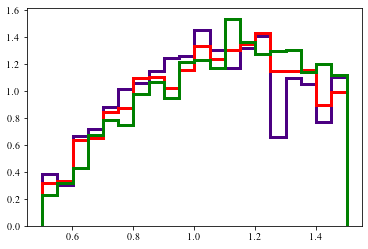

In [36]:
plt.hist(data_all['LOGG'][mask_un][mask_logg],20,weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',histtype='step',lw=3,label='Knot/box',density=True)
plt.hist(data_all['LOGG'][mask_un][mask_logg],20,weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Knot/box',density=True)
plt.hist(data_all['LOGG'][mask_un][mask_logg],20,weights=np.array(median_disc_probability)[mask_u][mask_logg],color='g',histtype='step',lw=3,label='Knot/box',density=True)


# cut the logg for the abundance plots between 1.5 and 0.5, and only select stars within 3 kpc from the centre for inner galaxy populations (to account for radial metalliticy gradients)

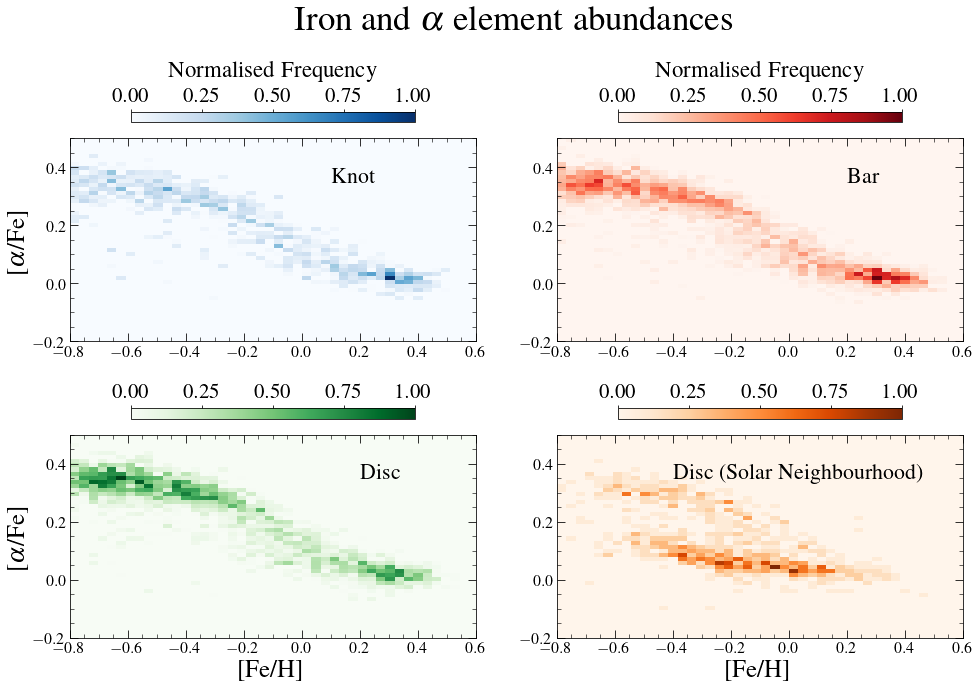

In [38]:

fig, axes = plt.subplots(2, 2,figsize=(16,10),facecolor='white')

plt.figtext(0.32, 1.,r'Iron and $\alpha$ element abundances',fontsize=35)

color = axes[0,0].imshow((np.nanmedian(hist_knot,axis=0)/np.max(np.nanmedian(hist_knot,axis=0))), extent=[-0.8,0.8,-0.2,0.5],cmap='Blues')
axes[0,0].text(0.1,0.35,'Knot',fontsize=22)
# axes[0,0].set_xlabel(r'[Fe/H]',fontsize=25)
axes[0,0].set_ylabel(r'[$\alpha$/Fe]',fontsize=25)
axes[0,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[0,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[0,0].minorticks_on()
axes[0,0].set_xlim(-0.8,0.6)
axes[0,0].set_ylim(-0.2,0.5)
cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'Normalised Frequency',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

color = axes[0,1].imshow((np.nanmedian(hist_bar,axis=0)/np.max(np.nanmedian(hist_bar,axis=0))), extent=[-0.8,0.8,-0.2,0.5],cmap='Reds')
axes[0,1].text(0.2,0.35,'Bar',fontsize=22)
# axes[0,1].set_xlabel(r'[Fe/H]',fontsize=25)
# axes[0,1].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[0,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[0,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[0,1].minorticks_on()
axes[0,1].set_xlim(-0.8,0.6)
axes[0,1].set_ylim(-0.2,0.5)
cax = axes[0,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'Normalised Frequency',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

color = axes[1,0].imshow((np.nanmedian(hist_disc,axis=0)/np.max(np.nanmedian(hist_disc,axis=0))), extent=[-0.8,0.8,-0.2,0.5],cmap='Greens')
axes[1,0].text(0.2,0.35,'Disc',fontsize=22)
axes[1,0].set_xlabel(r'[Fe/H]',fontsize=25)
axes[1,0].set_ylabel(r'[$\alpha$/Fe]',fontsize=25)
axes[1,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[1,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[1,0].minorticks_on()
axes[1,0].set_xlim(-0.8,0.6)
axes[1,0].set_ylim(-0.2,0.5)
cax = axes[1,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,0],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'Normalised Frequency',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

color = axes[1,1].imshow(hist_solar/np.max(hist_solar), extent=[-0.8,0.8,-0.2,0.5],cmap='Oranges')
axes[1,1].text(-.4,0.35,'Disc (Solar Neighbourhood)',fontsize=22)
axes[1,1].set_xlabel(r'[Fe/H]',fontsize=25)
# axes[1,1].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[1,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[1,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[1,1].minorticks_on()
axes[1,1].set_xlim(-0.8,0.6)
axes[1,1].set_ylim(-0.2,0.5)
cax = axes[1,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,1],cax=cax,orientation='horizontal')
# cbar.set_label(label=r'Normalised Frequency',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2,0].hist(data_todo['FE_H'][mask_solar],bins=np.linspace(-0.8,0.8,21),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# axes[2,0].hist(data_todo['FE_H'][mask_solar],bins=np.linspace(-0.8,0.8,21),color='darkorange',alpha=0.3,density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',histtype='step',lw=3,label='Knot',density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',alpha=0.3,density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
# axes[2,0].set_xlabel(r'[Fe/H]',fontsize=25)
# axes[2,0].legend(loc='upper right',fontsize=18,frameon=False,ncol=2)
# axes[2,0].set_ylabel(r'Normalised Frequency',fontsize=25)
# axes[2,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# axes[2,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
# axes[2,0].minorticks_on()
# axes[2,0].set_xlim(-0.8,0.6)
# axes[2,0].set_ylim(0.,2)

# axes[2,1].hist(data_todo['MG_FE'][mask_solar],bins=np.linspace(-0.2,0.5,21),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# axes[2,1].hist(data_todo['MG_FE'][mask_solar],bins=np.linspace(-0.2,0.5,21),color='darkorange',alpha=0.3,density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',histtype='step',lw=3,label='Knot',density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',alpha=0.3,density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
# axes[2,1].set_xlabel(r'[Mg/Fe]',fontsize=25)
# axes[2,1].legend(loc='upper right',fontsize=18,frameon=False,ncol=2)
# axes[2,1].set_ylabel(r'Normalised Frequency',fontsize=25)
# axes[2,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# axes[2,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
# axes[2,1].minorticks_on()
# axes[2,1].set_xlim(-0.2,0.5)
# axes[2,1].set_ylim(0.,10)

plt.savefig('../plots-paper/abundances-norm-3kpc-loggcut-alpha.pdf',dpi=600, bbox_inches = 'tight')


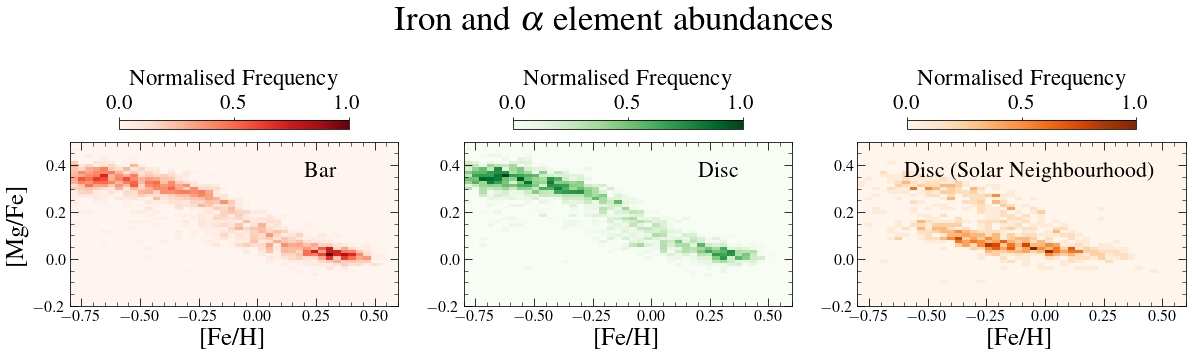

In [46]:

fig, axes = plt.subplots(1, 3,figsize=(20,6),facecolor='white')

plt.figtext(0.35, 0.95,r'Iron and $\alpha$ element abundances',fontsize=35)

color = axes[0].imshow((np.nanmedian(hist_bar,axis=0)/np.max(np.nanmedian(hist_bar,axis=0))), extent=[-0.8,0.8,-0.2,0.5],cmap='Reds')
axes[0].text(0.2,0.35,'Bar',fontsize=22)
axes[0].set_xlabel(r'[Fe/H]',fontsize=25)
axes[0].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[0].minorticks_on()
axes[0].set_xlim(-0.8,0.6)
axes[0].set_ylim(-0.2,0.5)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'Normalised Frequency',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

color = axes[1].imshow((np.nanmedian(hist_disc,axis=0)/np.max(np.nanmedian(hist_disc,axis=0))), extent=[-0.8,0.8,-0.2,0.5],cmap='Greens')
axes[1].text(0.2,0.35,'Disc',fontsize=22)
axes[1].set_xlabel(r'[Fe/H]',fontsize=25)
# axes[0,1].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[1].minorticks_on()
axes[1].set_xlim(-0.8,0.6)
axes[1].set_ylim(-0.2,0.5)
cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'Normalised Frequency',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

color = axes[2].imshow(hist_solar/np.max(hist_solar), extent=[-0.8,0.8,-0.2,0.5],cmap='Oranges')
axes[2].text(-.6,0.35,'Disc (Solar Neighbourhood)',fontsize=22)
axes[2].set_xlabel(r'[Fe/H]',fontsize=25)
# axes[1,1].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[2].minorticks_on()
axes[2].set_xlim(-0.8,0.6)
axes[2].set_ylim(-0.2,0.5)
cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'Normalised Frequency',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2,0].hist(data_todo['FE_H'][mask_solar],bins=np.linspace(-0.8,0.8,21),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# axes[2,0].hist(data_todo['FE_H'][mask_solar],bins=np.linspace(-0.8,0.8,21),color='darkorange',alpha=0.3,density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',histtype='step',lw=3,label='Knot',density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',alpha=0.3,density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
# axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
# axes[2,0].set_xlabel(r'[Fe/H]',fontsize=25)
# axes[2,0].legend(loc='upper right',fontsize=18,frameon=False,ncol=2)
# axes[2,0].set_ylabel(r'Normalised Frequency',fontsize=25)
# axes[2,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# axes[2,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
# axes[2,0].minorticks_on()
# axes[2,0].set_xlim(-0.8,0.6)
# axes[2,0].set_ylim(0.,2)

# axes[2,1].hist(data_todo['MG_FE'][mask_solar],bins=np.linspace(-0.2,0.5,21),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# axes[2,1].hist(data_todo['MG_FE'][mask_solar],bins=np.linspace(-0.2,0.5,21),color='darkorange',alpha=0.3,density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',histtype='step',lw=3,label='Knot',density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',alpha=0.3,density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
# axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
# axes[2,1].set_xlabel(r'[Mg/Fe]',fontsize=25)
# axes[2,1].legend(loc='upper right',fontsize=18,frameon=False,ncol=2)
# axes[2,1].set_ylabel(r'Normalised Frequency',fontsize=25)
# axes[2,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# axes[2,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
# axes[2,1].minorticks_on()
# axes[2,1].set_xlim(-0.2,0.5)
# axes[2,1].set_ylim(0.,10)



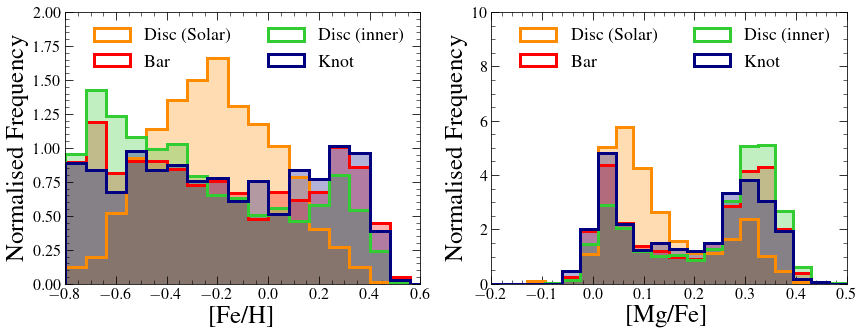

In [39]:

fig, axes = plt.subplots(1, 2,figsize=(14,5),facecolor='white')

axes[0].hist(data_todo['FE_H'][mask_solar],bins=np.linspace(-0.8,0.8,21),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
axes[0].hist(data_todo['FE_H'][mask_solar],bins=np.linspace(-0.8,0.8,21),color='darkorange',alpha=0.3,density=True)
axes[0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
axes[0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
axes[0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='navy',histtype='step',lw=3,label='Knot',density=True)
axes[0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
axes[0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
axes[0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='navy',alpha=0.3,density=True)
axes[0].set_xlabel(r'[Fe/H]',fontsize=25)
axes[0].legend(loc='upper right',fontsize=18,frameon=False,ncol=2)
axes[0].set_ylabel(r'Normalised Frequency',fontsize=25)
axes[0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[0].minorticks_on()
axes[0].set_xlim(-0.8,0.6)
axes[0].set_ylim(0.,2)

axes[1].hist(data_todo['MG_FE'][mask_solar],bins=np.linspace(-0.2,0.5,21),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
axes[1].hist(data_todo['MG_FE'][mask_solar],bins=np.linspace(-0.2,0.5,21),color='darkorange',alpha=0.3,density=True)
axes[1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
axes[1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
axes[1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='navy',histtype='step',lw=3,label='Knot',density=True)
axes[1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
axes[1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
axes[1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='navy',alpha=0.3,density=True)
axes[1].set_xlabel(r'[Mg/Fe]',fontsize=25)
axes[1].legend(loc='upper right',fontsize=18,frameon=False,ncol=2)
axes[1].set_ylabel(r'Normalised Frequency',fontsize=25)
axes[1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[1].minorticks_on()
axes[1].set_xlim(-0.2,0.5)
axes[1].set_ylim(0.,10)
# plt.figtext(0.35, 0.95,r'Iron and $\alpha$ chemical abundances',fontsize=35)
plt.savefig('../plots-paper/abundances-norm-3kpc-loggcut-histograms.pdf',dpi=600, bbox_inches = 'tight')


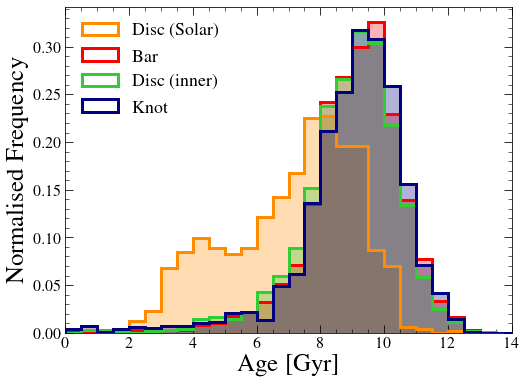

In [42]:
plt.figure(figsize=(8,6),facecolor='white')

plt.hist(data_todo['age_lowess_correct'][mask_solar],bins=np.linspace(-0,14,29),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
plt.hist(data_todo['age_lowess_correct'][mask_solar],bins=np.linspace(-0,14,29),color='darkorange',alpha=0.3,density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='navy',histtype='step',lw=3,label='Knot',density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='navy',alpha=0.3,density=True)
plt.xlabel(r'Age [Gyr]',fontsize=25)
plt.legend(loc='upper left',fontsize=18,frameon=False)
plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,14)
# plt.ylim(0.,10)
plt.savefig('../plots-paper/abundances-norm-3kpc-loggcut-age-histograms.pdf',dpi=600, bbox_inches = 'tight')


In [49]:
print(np.sum(np.array(median_disc_probability)[mask_u][mask_logg]*data_all['FE_H'][mask_un][mask_logg])/np.sum(np.array(median_disc_probability)[mask_u][mask_logg]))
print(np.sum(np.array(median_bar_probability)[mask_u][mask_logg]*data_all['FE_H'][mask_un][mask_logg])/np.sum(np.array(median_bar_probability)[mask_u][mask_logg]))
print(np.sum(np.array(median_knot_probability)[mask_u][mask_logg]*data_all['FE_H'][mask_un][mask_logg])/np.sum(np.array(median_knot_probability)[mask_u][mask_logg]))

print(np.sum(np.array(median_disc_probability)[mask_u][mask_logg]*data_all['MG_FE'][mask_un][mask_logg])/np.sum(np.array(median_disc_probability)[mask_u][mask_logg]))
print(np.sum(np.array(median_bar_probability)[mask_u][mask_logg]*data_all['MG_FE'][mask_un][mask_logg])/np.sum(np.array(median_bar_probability)[mask_u][mask_logg]))
print(np.sum(np.array(median_knot_probability)[mask_u][mask_logg]*data_all['MG_FE'][mask_un][mask_logg])/np.sum(np.array(median_knot_probability)[mask_u][mask_logg]))

# print(np.nansum(np.array(median_disc_probability)[mask_u][mask_logg]*data_all['age_lowess_correct'][mask_un][mask_logg])/np.nansum(np.array(median_disc_probability)[mask_u][mask_logg]))
# print(np.nansum(np.array(median_bar_probability)[mask_u][mask_logg]*data_all['age_lowess_correct'][mask_un][mask_logg])/np.nansum(np.array(median_bar_probability)[mask_u][mask_logg]))
# print(np.nansum(np.array(median_knot_probability)[mask_u][mask_logg]*data_all['age_lowess_correct'][mask_un][mask_logg])/np.nansum(np.array(median_knot_probability)[mask_u][mask_logg]))



-0.2827608645219278
-0.20417400032026983
-0.17726181771145597
0.22859246681986067
0.19957139255814285
0.18659005665922448


In [ ]:
mask_logg = (data_all['LOGG'][mask_un]>0.5)&(data_all['LOGG'][mask_un]<1.5)&(np.abs(Zgal)[mask_un]<0.3)
# &(rads[mask_un]<3.)
mask_solar_1 = np.load('/Users/dhortadarrington/Documents/Projects/mw-bar/sav/mask_solar.npy',allow_pickle=True)
mask_solar = mask_solar_1&(data_todo['LOGG']>0.5)&(data_todo['LOGG']<1.5) &(np.abs(data_todo['Zgal']*8.178)<0.3)
hist_solar,xedges,yedges = get_2dhist_solar(data_todo['FE_H'][mask_solar],data_todo['MG_FE'][mask_solar])

In [ ]:
plt.figure(figsize=(8,6),facecolor='white')

plt.hist(data_todo['age_lowess_correct'][mask_solar],bins=np.linspace(-0,14,29),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
plt.hist(data_todo['age_lowess_correct'][mask_solar],bins=np.linspace(-0,14,29),color='darkorange',alpha=0.3,density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)

plt.xlabel(r'Age [Gyr]',fontsize=25)
plt.legend(loc='upper left',fontsize=18,frameon=False)
plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,14)
# plt.ylim(0.,10)

# Plot the Lx, Ly, and Lz histograms

In [ ]:
plt.figure(figsize=(16,5),constrained_layout=True,facecolor='white')

plt.subplot(1,3,1)
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
plt.hist(Lx[mask_bar],bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability)[mask_bar],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(Lx[mask_disc],bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(Lx[mask_bar],bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability)[mask_bar],color='r',alpha=0.3,density=True)
plt.hist(Lx[mask_disc],bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',alpha=0.3,density=True)
plt.xlabel(r'L$_{x}$ [kpc km s$^{-1}$]',fontsize=25)
# plt.legend(loc='upper left',fontsize=18,frameon=False)
plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-600,600)


plt.subplot(1,3,2)
plt.title(r'$r < 5$ [kpc]',fontsize=35,pad=15)
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
plt.hist(Ly[mask_bar],bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability)[mask_bar],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(Ly[mask_disc],bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(Ly[mask_bar],bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability)[mask_bar],color='r',alpha=0.3,density=True)
plt.hist(Ly[mask_disc],bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',alpha=0.3,density=True)
plt.xlabel(r'L$_{y}$ [kpc km s$^{-1}$]',fontsize=25)
# plt.legend(loc='upper left',fontsize=18,frameon=False)
# plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-600,600)


plt.subplot(1,3,3)
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
plt.hist(-Lz[mask_bar],bins=np.linspace(-500,1500,31),weights=np.array(median_bar_probability)[mask_bar],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(-Lz[mask_disc],bins=np.linspace(-500,1500,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(-Lz[mask_bar],bins=np.linspace(-500,1500,31),weights=np.array(median_bar_probability)[mask_bar],color='r',alpha=0.3,density=True)
plt.hist(-Lz[mask_disc],bins=np.linspace(-500,1500,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',alpha=0.3,density=True)
plt.xlabel(r'L$_{z}$ [kpc km s$^{-1}$]',fontsize=25)
# plt.legend(loc='upper right',fontsize=18,frameon=False)
# plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-500,1500)


In [ ]:
plt.figure(figsize=(16,5),constrained_layout=True,facecolor='white')

plt.subplot(1,3,1)
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
plt.hist(x[mask_bar],bins=np.linspace(-5,5,31),weights=np.array(median_bar_probability)[mask_bar],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(x[mask_disc],bins=np.linspace(-5,5,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(x[mask_bar],bins=np.linspace(-5,5,31),weights=np.array(median_bar_probability)[mask_bar],color='r',alpha=0.3,density=True)
plt.hist(x[mask_disc],bins=np.linspace(-5,5,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',alpha=0.3,density=True)
plt.xlabel(r'${x}$ [kpc km s$^{-1}$]',fontsize=25)
# plt.legend(loc='upper left',fontsize=18,frameon=False)
plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)


plt.subplot(1,3,2)
plt.title(r'$r < 5$ [kpc]',fontsize=35,pad=15)
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
plt.hist(y[mask_bar],bins=np.linspace(-5,5,31),weights=np.array(median_bar_probability)[mask_bar],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(y[mask_disc],bins=np.linspace(-5,5,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(y[mask_bar],bins=np.linspace(-5,5,31),weights=np.array(median_bar_probability)[mask_bar],color='r',alpha=0.3,density=True)
plt.hist(y[mask_disc],bins=np.linspace(-5,5,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',alpha=0.3,density=True)
plt.xlabel(r'${y}$ [kpc km s$^{-1}$]',fontsize=25)
# plt.legend(loc='upper left',fontsize=18,frameon=False)
# plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)


plt.subplot(1,3,3)
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
plt.hist(z[mask_bar],bins=np.linspace(-5,5,31),weights=np.array(median_bar_probability)[mask_bar],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(z[mask_disc],bins=np.linspace(-5,5,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(z[mask_bar],bins=np.linspace(-5,5,31),weights=np.array(median_bar_probability)[mask_bar],color='r',alpha=0.3,density=True)
plt.hist(z[mask_disc],bins=np.linspace(-5,5,31),weights=np.array(median_disc_probability)[mask_disc],color='limegreen',alpha=0.3,density=True)
plt.xlabel(r'${z}$ [kpc km s$^{-1}$]',fontsize=25)
# plt.legend(loc='upper right',fontsize=18,frameon=False)
# plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)


# Do the same for stars in $|z|<0.3$ kpc

In [29]:
mask_solar_1 = np.load('/Users/dhortadarrington/Documents/Projects/mw-bar/sav/mask_solar.npy',allow_pickle=True)
mask_solar = mask_solar_1&(data_todo['LOGG']>0.5)&(data_todo['LOGG']<1.5) &(np.abs(data_todo['Zgal']*8.178)>0.5)&\
   (np.abs(data_todo['Zgal']*8.178)<2.)
# &(np.abs(data_todo['Zgal']*8.178)<0.3)
hist_solar,xedges,yedges = get_2dhist_solar(data_todo['FE_H'][mask_solar],data_todo['MG_FE'][mask_solar])


In [32]:
print(len(np.array(all_knot_probability)[mask_u]))


18271


In [42]:
print(np.min(np.abs(data_todo['Zgal'][mask_solar]*8.178)))

0.510707922


In [46]:
mask_logg = (data_all['LOGG'][mask_un]>0.5)&(data_all['LOGG'][mask_un]<1.5) &(Zgal[mask_un]<2.) &(Zgal[mask_un]>0.5)
# &(Zgal[mask_un]<0.3)
# &(rads[mask_un]<3.)

knot_probs = np.array(all_knot_probability)[mask_u][mask_logg].T
bar_probs = np.array(all_bar_probability)[mask_u][mask_logg].T
disc_probs = np.array(all_disc_probability)[mask_u][mask_logg].T

hist_knot = np.zeros((len(knot_probs),50,50))
hist_bar = np.zeros((len(bar_probs),50,50))
hist_disc = np.zeros((len(disc_probs),50,50))

for indx, i in enumerate(knot_probs):
    hist_knot[indx],xedges_knot,yedges_knot = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],i)
    hist_bar[indx],xedges_bar,yedges_bar = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],bar_probs[indx])
    hist_disc[indx],xedges_disc,yedges_disc = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],disc_probs[indx])


# mask_logg = (data_all['LOGG'][mask_un]>0.5)&(data_all['LOGG'][mask_un]<1.5)
# # &(Zgal[mask_un]<0.3)
# # &(rads[mask_un]<3.)

# knot_probs = np.array(all_knot_probability)[mask_u][mask_logg].T
# bar_probs = np.array(all_bar_probability)[mask_u][mask_logg].T
# disc_probs = np.array(all_disc_probability)[mask_u][mask_logg].T

# hist_knot = np.zeros((len(knot_probs),50,50))
# hist_bar = np.zeros((len(bar_probs),50,50))
# hist_disc = np.zeros((len(disc_probs),50,50))

# for indx, i in enumerate(knot_probs):
#     hist_knot[indx],xedges_knot,yedges_knot = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],i)
#     hist_bar[indx],xedges_bar,yedges_bar = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],bar_probs[indx])
#     hist_disc[indx],xedges_disc,yedges_disc = get_2dhist(data_all['FE_H'][mask_un][mask_logg],data_all['MG_FE'][mask_un][mask_logg],disc_probs[indx])


In [47]:
print(len(np.array(all_knot_probability)[mask_u][mask_logg]))
print(len(data_all['FE_H'][mask_un][mask_logg]))

2710
2710


(0.0, 10.0)

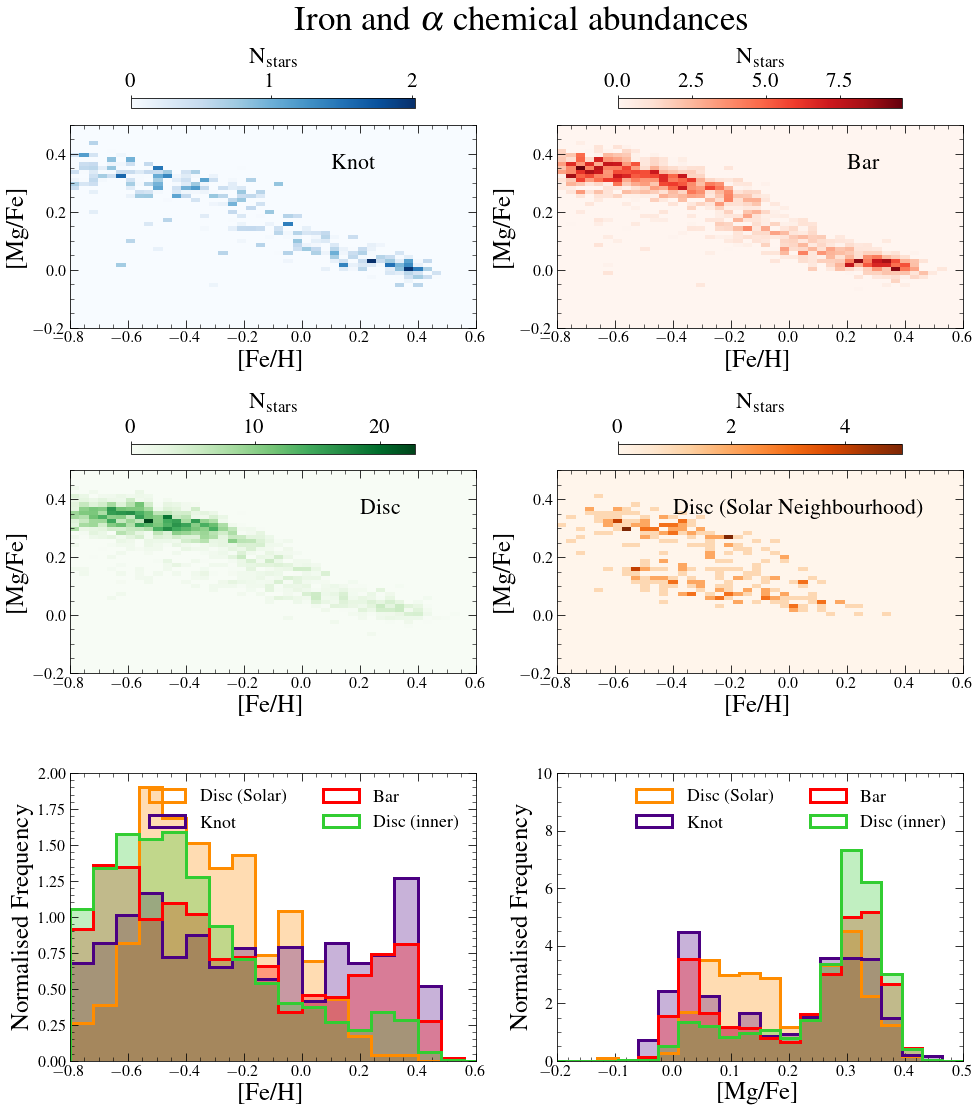

In [48]:

fig, axes = plt.subplots(3, 2,figsize=(16,18),facecolor='white')

plt.figtext(0.32, 0.92,r'Iron and $\alpha$ chemical abundances',fontsize=35)

color = axes[0,0].imshow(np.nanmedian(hist_knot,axis=0), extent=[-0.8,0.8,-0.2,0.5],cmap='Blues')
axes[0,0].text(0.1,0.35,'Knot',fontsize=22)
axes[0,0].set_xlabel(r'[Fe/H]',fontsize=25)
axes[0,0].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[0,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[0,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[0,0].minorticks_on()
axes[0,0].set_xlim(-0.8,0.6)
axes[0,0].set_ylim(-0.2,0.5)
cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

color = axes[0,1].imshow(np.nanmedian(hist_bar,axis=0), extent=[-0.8,0.8,-0.2,0.5],cmap='Reds')
axes[0,1].text(0.2,0.35,'Bar',fontsize=22)
axes[0,1].set_xlabel(r'[Fe/H]',fontsize=25)
axes[0,1].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[0,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[0,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[0,1].minorticks_on()
axes[0,1].set_xlim(-0.8,0.6)
axes[0,1].set_ylim(-0.2,0.5)
cax = axes[0,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

color = axes[1,0].imshow(np.nanmedian(hist_disc,axis=0), extent=[-0.8,0.8,-0.2,0.5],cmap='Greens')
axes[1,0].text(0.2,0.35,'Disc',fontsize=22)
axes[1,0].set_xlabel(r'[Fe/H]',fontsize=25)
axes[1,0].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[1,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[1,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[1,0].minorticks_on()
axes[1,0].set_xlim(-0.8,0.6)
axes[1,0].set_ylim(-0.2,0.5)
cax = axes[1,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

color = axes[1,1].imshow(hist_solar, extent=[-0.8,0.8,-0.2,0.5],cmap='Oranges')
axes[1,1].text(-.4,0.35,'Disc (Solar Neighbourhood)',fontsize=22)
axes[1,1].set_xlabel(r'[Fe/H]',fontsize=25)
axes[1,1].set_ylabel(r'[Mg/Fe]',fontsize=25)
axes[1,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[1,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[1,1].minorticks_on()
axes[1,1].set_xlim(-0.8,0.6)
axes[1,1].set_ylim(-0.2,0.5)
cax = axes[1,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23,labelpad=10)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

axes[2,0].hist(data_todo['FE_H'][mask_solar],bins=np.linspace(-0.8,0.8,21),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
axes[2,0].hist(data_todo['FE_H'][mask_solar],bins=np.linspace(-0.8,0.8,21),color='darkorange',alpha=0.3,density=True)
axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',histtype='step',lw=3,label='Knot',density=True)
axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',alpha=0.3,density=True)
axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
axes[2,0].hist(data_all['FE_H'][mask_un][mask_logg],bins=np.linspace(-0.8,0.8,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
axes[2,0].set_xlabel(r'[Fe/H]',fontsize=25)
axes[2,0].legend(loc='upper right',fontsize=18,frameon=False,ncol=2)
axes[2,0].set_ylabel(r'Normalised Frequency',fontsize=25)
axes[2,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[2,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[2,0].minorticks_on()
axes[2,0].set_xlim(-0.8,0.6)
axes[2,0].set_ylim(0.,2)

axes[2,1].hist(data_todo['MG_FE'][mask_solar],bins=np.linspace(-0.2,0.5,21),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
axes[2,1].hist(data_todo['MG_FE'][mask_solar],bins=np.linspace(-0.2,0.5,21),color='darkorange',alpha=0.3,density=True)
axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',histtype='step',lw=3,label='Knot',density=True)
axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_knot_probability)[mask_u][mask_logg],color='indigo',alpha=0.3,density=True)
axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
axes[2,1].hist(data_all['MG_FE'][mask_un][mask_logg],bins=np.linspace(-0.2,0.5,21),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
axes[2,1].set_xlabel(r'[Mg/Fe]',fontsize=25)
axes[2,1].legend(loc='upper right',fontsize=18,frameon=False,ncol=2)
axes[2,1].set_ylabel(r'Normalised Frequency',fontsize=25)
axes[2,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
axes[2,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
axes[2,1].minorticks_on()
axes[2,1].set_xlim(-0.2,0.5)
axes[2,1].set_ylim(0.,10)



In [ ]:
plt.figure(figsize=(8,6),facecolor='white')

plt.hist(data_todo['age_lowess_correct'][mask_solar],bins=np.linspace(-0,14,29),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
plt.hist(data_todo['age_lowess_correct'][mask_solar],bins=np.linspace(-0,14,29),color='darkorange',alpha=0.3,density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',histtype='step',lw=3,label='Bar',density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',histtype='step',lw=3,label='Disc (inner)',density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_bar_probability)[mask_u][mask_logg],color='r',alpha=0.3,density=True)
plt.hist(data_all['age_lowess_correct'][mask_un][mask_logg],bins=np.linspace(-0,14,29),weights=np.array(median_disc_probability)[mask_u][mask_logg],color='limegreen',alpha=0.3,density=True)
plt.xlabel(r'Age [Gyr]',fontsize=25)
plt.legend(loc='upper left',fontsize=18,frameon=False)
plt.ylabel(r'Normalised Frequency',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(0,14)
# plt.ylim(0.,10)

In [ ]:
np.shape(np.array(median_knot_probability)[mask_u])

In [ ]:
plt.hist(np.nanmedian(hist_knot_1d,axis=0))

In [ ]:

plt.figure(figsize=(8,6),facecolor='white')

plt.imshow(np.nanmedian(hist_bar,axis=0), extent=[-0.8,0.8,-0.2,0.5],cmap='Reds')
# plt.text(0.2,0.3,label,fontsize=18)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.8,0.6)
plt.ylim(-0.2,0.5)
plt.colorbar()
plt.show()


In [ ]:

plt.figure(figsize=(8,6),facecolor='white')

plt.imshow(np.nanmedian(hist_disc,axis=0), extent=[-0.8,0.8,-0.2,0.5],cmap='Greens')
# plt.text(0.2,0.3,label,fontsize=18)
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.8,0.6)
plt.ylim(-0.2,0.5)
plt.colorbar()
plt.show()


In [ ]:
fig, ax_nstd = plt.subplots(1,3, figsize=(26,6),facecolor='white')

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5


# lx-ly
ax_nstd[0].scatter(Lxdisc,Lydisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[0].scatter(Lxbar,Lybar,s=1,c='r',alpha=0.3)
confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[0].scatter(Lxknot,Lyknot,s=1,c='indigo',alpha=0.3)
confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[0].set_xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
ax_nstd[0].set_ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
ax_nstd[0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0].minorticks_on()
ax_nstd[0].set_xlim(-600,600)
ax_nstd[0].set_ylim(-600,600)

# lx-lz
ax_nstd[1].scatter(Lxdisc,Lzdisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lxdisc,Lzdisc, ax_nstd[1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1].scatter(Lxbar,Lzbar,s=1,c='r',alpha=0.3)
confidence_ellipse(Lxbar,Lzbar, ax_nstd[1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1].scatter(Lxknot,Lzknot,s=1,c='indigo',alpha=0.3)
confidence_ellipse(Lxknot,Lzknot, ax_nstd[1], n_std=2,
                   label=r'Pseudo-bulge', edgecolor='indigo',lw=4)
ax_nstd[1].set_xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
ax_nstd[1].set_ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
ax_nstd[1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1].minorticks_on()
ax_nstd[1].set_xlim(-600,600)
ax_nstd[1].set_ylim(-1500,500)

# ly-lz
ax_nstd[2].scatter(Lydisc,Lzdisc,s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lydisc,Lzdisc, ax_nstd[2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2].scatter(Lybar,Lzbar,s=1,c='r',alpha=0.3)
confidence_ellipse(Lybar,Lzbar, ax_nstd[2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2].scatter(Lyknot,Lzknot,s=1,c='indigo',alpha=0.3)
confidence_ellipse(Lyknot,Lzknot, ax_nstd[2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2].set_xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
ax_nstd[2].set_ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
ax_nstd[2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2].minorticks_on()
ax_nstd[2].set_xlim(-600,600)
ax_nstd[2].set_ylim(-1500,500)


plt.show()


# Plot the Mg-Fe plane

In [ ]:
idsknot = []
idsbar = []
idsdisc = []

for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    idsknot0,idsbar0,idsdisc0= get_ids(i)
    
    idsknot.extend(idsknot0)
    idsbar.extend(idsbar0)
    idsdisc.extend(idsdisc0)
    

In [ ]:
idsknot_all = []
idsbar_all = []
idsdisc_all = []

for indx, i in tqdm.tqdm_notebook(enumerate(datas)):
    idsknot0,idsbar0,idsdisc0= get_ids_all(i)
    
    idsknot.extend(idsknot0)
    idsbar.extend(idsbar0)
    idsdisc.extend(idsdisc0)
    

In [ ]:
path_m = '/Users/dhortadarrington/Documents/Master/data/dr17_dr3_McMillan_astroNN_rev1.fits'
tb_m = fits.open(path_m)
data_m = tb_m[1].data 

In [ ]:
mask_knot = np.isin(data_m['APOGEE_ID_1'],idsknot)
mask_bar = np.isin(data_m['APOGEE_ID_1'],idsbar)
mask_disc = np.isin(data_m['APOGEE_ID_1'],idsdisc)

In [ ]:
mask_knot_all = np.isin(data_m['APOGEE_ID_1'],idsknot_all)
mask_bar_all = np.isin(data_m['APOGEE_ID_1'],idsbar_all)
mask_disc_all = np.isin(data_m['APOGEE_ID_1'],idsdisc_all)

In [ ]:
from matplotlib.colors import LogNorm
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<6000)&(data_m['LOGG']>0)&(data_m['LOGG']<3)

plt.figure(figsize=(8,6),facecolor='white')
plt.hist2d(data_m['TEFF'][mask_tl],data_m['LOGG'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['TEFF'][mask_disc],data_m['LOGG'][mask_disc],c='limegreen',s=20)
plt.scatter(data_m['TEFF'][mask_bar],data_m['LOGG'][mask_bar],c='r',s=20)
plt.scatter(data_m['TEFF'][mask_knot],data_m['LOGG'][mask_knot],c='b',s=20)
plt.xlim(6000,3000)
plt.ylim(3,0)
plt.xlabel('Teff [K]',fontsize=25)
plt.ylabel('logg',fontsize=25)


In [ ]:
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<4750)&(data_m['LOGG']>0)&(data_m['LOGG']<1.5)

plt.figure(figsize=(8,6),facecolor='white')
# plt.hist2d(data_m['C_FE'][mask_tl],data_m['N_FE'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['C_FE'][mask_disc&mask_tl],data_m['N_FE'][mask_disc&mask_tl],c='limegreen',s=20)
plt.scatter(data_m['C_FE'][mask_bar&mask_tl],data_m['N_FE'][mask_bar&mask_tl],c='r',s=20)
plt.scatter(data_m['C_FE'][mask_knot&mask_tl],data_m['N_FE'][mask_knot&mask_tl],c='b',s=20)
plt.xlim(-0.5,0.5)
plt.ylim(-0.25,1.)
plt.xlabel('[C/Fe]',fontsize=25)
plt.ylabel('[N/Fe]',fontsize=25)


In [ ]:
no = data_m['N_FE']-data_m['O_FE']
mgmn =data_m['MG_FE']-data_m['MN_FE']

# log(x/y) = log(x)-log(y)  


In [ ]:
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<4750)&(data_m['LOGG']>0)&(data_m['LOGG']<1.5)

plt.figure(figsize=(8,6),facecolor='white')
# plt.hist2d(data_m['C_FE'][mask_tl],data_m['N_FE'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['AL_FE'][mask_disc&mask_tl],no[mask_disc&mask_tl],c='limegreen',s=20)
plt.scatter(data_m['AL_FE'][mask_bar&mask_tl],no[mask_bar&mask_tl],c='r',s=20)
plt.scatter(data_m['AL_FE'][mask_knot&mask_tl],no[mask_knot&mask_tl],c='b',s=20)
# plt.xlim(-0.5,0.5)
# plt.ylim(-0.25,1.)
plt.xlabel('[Al/Fe]',fontsize=25)
plt.ylabel('[N/O]',fontsize=25)


In [ ]:
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<4750)&(data_m['LOGG']>0)&(data_m['LOGG']<1.5)

plt.figure(figsize=(8,6),facecolor='white')
# plt.hist2d(data_m['C_FE'][mask_tl],data_m['N_FE'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['AL_FE'][mask_disc&mask_tl],mgmn[mask_disc&mask_tl],c='limegreen',s=20)
plt.scatter(data_m['AL_FE'][mask_bar&mask_tl],mgmn[mask_bar&mask_tl],c='r',s=20)
plt.scatter(data_m['AL_FE'][mask_knot&mask_tl],mgmn[mask_knot&mask_tl],c='b',s=20)
# plt.xlim(-0.5,0.5)
# plt.ylim(-0.25,1.)
plt.xlabel('[Al/Fe]',fontsize=25)
plt.ylabel('[Mg/Mn]',fontsize=25)


In [ ]:
mask_tl = (data_m['TEFF']>3000)&(data_m['TEFF']<6000)&(data_m['LOGG']>0)&(data_m['LOGG']<3)

plt.figure(figsize=(8,6),facecolor='white')
# plt.hist2d(data_m['C_FE'][mask_tl],data_m['N_FE'][mask_tl],bins=500,norm=LogNorm(),cmap='bone')
plt.scatter(data_m['AL_FE'][mask_disc],mgmn[mask_disc],c='limegreen',s=20)
plt.scatter(data_m['AL_FE'][mask_bar],mgmn[mask_bar],c='r',s=20)
plt.scatter(data_m['AL_FE'][mask_knot],mgmn[mask_knot],c='b',s=20)
# plt.xlim(-0.5,0.5)
# plt.ylim(-0.25,1.)
plt.xlabel('[Al/Fe]',fontsize=25)
plt.ylabel('[Mg/Mn]',fontsize=25)


# Compute the Tinsley diagram for the different components

In [ ]:
path_all = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-all.fits'
tb_all = fits.open(path_all)
data_all = tb_all[1].data 

In [ ]:
def plot_weighted_2d(xs,ys,weights,cmap='Greens',label='pseudo-bulge'):
    nbins = 20
    # compute the weighted 2d histogram
    xlin = np.linspace(-0.6,0.8,21)
    ylin = np.linspace(-0.1,0.4,11)
    hist, xedges, yedges = np.histogram2d(-xs, ys, bins=[xlin,ylin], weights=weights)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    hist = np.flipud(np.rot90(hist))

    plt.imshow(hist, extent=extent,cmap=cmap)
    plt.text(0.2,0.3,label,fontsize=18)
    plt.xlabel(r'[Fe/H]',fontsize=25)
    plt.ylabel(r'[Mg/Fe]',fontsize=25)
    plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
    plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
    plt.minorticks_on()
    plt.xlim(-0.6,0.8)
    plt.ylim(-0.1,0.4)
    plt.colorbar()
    plt.show()

In [ ]:
plt.figure(figsize=(8,6),facecolor='white')
plot_weighted_2d(data_all['FE_H'],data_all['MG_FE'],data_all['P_knot'],cmap='Blues')


# # plt.subplot(1,3,2)
# plot_weighted_2d(data_all['FE_H'],data_all['MG_FE'],data_all['P_bar'],cmap='Reds',label='bar')
# plt.xlabel(r'[Fe/H]',fontsize=25)
# # plt.ylabel(r'[Mg/Fe]',fontsize=25)
# # plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# # plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# # plt.minorticks_on()
# # plt.xlim(-0.6,0.8)
# # plt.ylim(-0.1,0.4)

# # plt.subplot(1,3,3)
# plot_weighted_2d(data_all['FE_H'],data_all['MG_FE'],data_all['P_disc'],cmap='Greens',label='disc')
# # plt.xlabel(r'[Fe/H]',fontsize=25)
# # # plt.ylabel(r'[Mg/Fe]',fontsize=25)
# # plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# # plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# # plt.minorticks_on()
# # plt.xlim(-0.6,0.8)
# # plt.ylim(-0.1,0.4)


In [ ]:
zgal2 = data_m['Zgal']*8.178


fe_all = data_m['FE_H'][(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
mg_all = data_m['MG_FE'][(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
data_all = np.array([fe_all,mg_all])

fe_knot = data_m['FE_H'][mask_knot&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
mg_knot = data_m['MG_FE'][mask_knot&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data_m['FE_H'][mask_bar&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
mg_bar = data_m['MG_FE'][mask_bar&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data_m['FE_H'][mask_disc&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
mg_disc = data_m['MG_FE'][mask_disc&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)]
data_disc = np.array([fe_disc,mg_disc])


In [ ]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.6:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.6:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.6:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.6:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


In [ ]:
#  check the tinsley diagram for thin disc in solar neighbourhood
zgal2 = data_m['Zgal']*8.178
Rgal2 = data_m['Rgal']*8.178
fe_disc_solar = data_m['FE_H'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
mg_disc_solar = data_m['MG_FE'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
data_disc_solar = np.array([fe_disc_solar,mg_disc_solar])
mask_solar = (Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)


In [ ]:
k_disc_solar = kde.gaussian_kde(data_disc_solar)
nbins=20
xi_disc_solar, yi_disc_solar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc_solar = k_disc_solar(np.vstack([xi_disc_solar.flatten(), yi_disc_solar.flatten()]))


In [ ]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(2, 3,figsize=(28,12),facecolor='white')


# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
# axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0,0].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.6, 0.6,-0.1, 0.4])
axes[0,0].text(-0.3,0.3,'Knot ($|z|$$<$300 pc)',fontsize=24)
axes[0,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=3,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,0].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[0,1].text(-0.3,0.3,'Bar ($|z|$$<$300 pc)',fontsize=24)
# axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[0,1].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.6, 0.6,-0.1, 0.4])
axes[0,1].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=3,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,1].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,1].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[0,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[0,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[0,2].text(-0.3,0.3,'Disc (inner, $|z|$$<$300 pc)',fontsize=24)
# axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[0,2].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.6, 0.6,-0.1, 0.4])
axes[0,2].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=3,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[0,2].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,2].minorticks_on()

cax = axes[0,2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[0,2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

axes[1,0].text(-0.3,0.3,'Disc (Solar, $|z|$$<$300 pc)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,0].imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.6, 0.6,-0.1, 0.4])
axes[1,0].contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_solar])),fontsize=20)
axes[1,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_solar])),fontsize=20)
axes[1,0].set_xlabel('[Fe/H]',fontsize=30)
axes[1,0].set_ylabel('[Mg/Fe]',fontsize=30)
axes[1,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,1].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.6, 0.6,-0.1, 0.4])
axes[1,1].text(-0.3,0.3,'All ($|z|$$<$300 pc)',fontsize=24)
axes[1,1].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=3,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,1].set_xlabel('[Fe/H]',fontsize=25)
axes[1,1].set_ylabel('[Mg/Fe]',fontsize=25)
axes[1,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

bins_feh = np.linspace(0,14,15)
mask_all = (data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)
axes[1,2].set_title(r'$|z|$$<$300 pc',fontsize=30)
axes[1,2].hist(data_m['age_lowess_correct'][mask_all&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='k',lw=4,density=True,label='All')
axes[1,2].hist(data_m['age_lowess_correct'][mask_all&(np.abs(zgal2)<0.3)],bins=bins_feh,color='k',alpha=0.4,density=True)

axes[1,2].hist(data_m['age_lowess_correct'][mask_disc&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='g',lw=4,density=True,label='Disc (inner)')
axes[1,2].hist(data_m['age_lowess_correct'][mask_disc&(np.abs(zgal2)<0.3)],bins=bins_feh,color='g',alpha=0.4,density=True)

axes[1,2].hist(data_m['age_lowess_correct'][mask_bar&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='r',lw=4,density=True,label='Bar')
axes[1,2].hist(data_m['age_lowess_correct'][mask_bar&(np.abs(zgal2)<0.3)],bins=bins_feh,color='r',alpha=0.4,density=True)

axes[1,2].hist(data_m['age_lowess_correct'][mask_solar&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='darkorange',lw=4,density=True,label='Disc (Solar)')
axes[1,2].hist(data_m['age_lowess_correct'][mask_solar&(np.abs(zgal2)<0.3)],bins=bins_feh,color='darkorange',alpha=0.4,density=True)

axes[1,2].hist(data_m['age_lowess_correct'][mask_knot&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='b',lw=4,density=True,label='Pseudo-bulge')
axes[1,2].hist(data_m['age_lowess_correct'][mask_knot&(np.abs(zgal2)<0.3)],bins=bins_feh,color='b',alpha=0.4,density=True)
axes[1,2].set_xlabel('Age [Gyr]',fontsize=25)
axes[1,2].set_ylabel('Norm. Freq.',fontsize=25)
axes[1,2].legend(loc='upper left',frameon=False,fontsize=16)
axes[1,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,2].minorticks_on()



In [ ]:


bins_feh = np.linspace(0,14,15)
mask_all = (data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(np.abs(zgal2)<0.3)
plt.set_title(r'$|z|$$<$300 pc',fontsize=30)
plt.hist(data_m['age_lowess_correct'][mask_all&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='k',lw=4,density=True,label='All')
plt.hist(data_m['age_lowess_correct'][mask_all&(np.abs(zgal2)<0.3)],bins=bins_feh,color='k',alpha=0.4,density=True)

plt.hist(data_m['age_lowess_correct'][mask_disc&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='g',lw=4,density=True,label='Disc (inner)')
plt.hist(data_m['age_lowess_correct'][mask_disc&(np.abs(zgal2)<0.3)],bins=bins_feh,color='g',alpha=0.4,density=True)

plt.hist(data_m['age_lowess_correct'][mask_bar&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='r',lw=4,density=True,label='Bar')
plt.hist(data_m['age_lowess_correct'][mask_bar&(np.abs(zgal2)<0.3)],bins=bins_feh,color='r',alpha=0.4,density=True)

plt.hist(data_m['age_lowess_correct'][mask_solar&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='darkorange',lw=4,density=True,label='Disc (Solar)')
plt.hist(data_m['age_lowess_correct'][mask_solar&(np.abs(zgal2)<0.3)],bins=bins_feh,color='darkorange',alpha=0.4,density=True)

plt.hist(data_m['age_lowess_correct'][mask_knot&(np.abs(zgal2)<0.3)],bins=bins_feh,histtype='step',color='b',lw=4,density=True,label='Pseudo-bulge')
plt.hist(data_m['age_lowess_correct'][mask_knot&(np.abs(zgal2)<0.3)],bins=bins_feh,color='b',alpha=0.4,density=True)
plt.set_xlabel('Age [Gyr]',fontsize=25)
plt.set_ylabel('Norm. Freq.',fontsize=25)
plt.legend(loc='upper left',frameon=False,fontsize=16)
plt.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
plt.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
plt.tick_params(which='minor', length=8, direction='in',top=True,right=True)
plt.minorticks_on()

In [ ]:
zgal2 = data_m['Zgal']*8.178


fe_all = data_m['FE_H'][(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
mg_all = data_m['MG_FE'][(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
data_all = np.array([fe_all,mg_all])

fe_knot = data_m['FE_H'][mask_knot&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
mg_knot = data_m['MG_FE'][mask_knot&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data_m['FE_H'][mask_bar&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
mg_bar = data_m['MG_FE'][mask_bar&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data_m['FE_H'][mask_disc&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
mg_disc = data_m['MG_FE'][mask_disc&(data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)]
data_disc = np.array([fe_disc,mg_disc])


In [ ]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


In [ ]:
#  check the tinsley diagram for thin disc in solar neighbourhood
zgal2 = data_m['Zgal']*8.178
Rgal2 = data_m['Rgal']*8.178
fe_disc_solar = data_m['FE_H'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)]
mg_disc_solar = data_m['MG_FE'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)]
data_disc_solar = np.array([fe_disc_solar,mg_disc_solar])
mask_solar = (Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)


In [ ]:
k_disc_solar = kde.gaussian_kde(data_disc_solar)
nbins=20
xi_disc_solar, yi_disc_solar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc_solar = k_disc_solar(np.vstack([xi_disc_solar.flatten(), yi_disc_solar.flatten()]))


In [ ]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(2, 3,figsize=(28,14),facecolor='white')


# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
# axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0,0].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,0].text(-0.3,0.3,'Knot',fontsize=24)
axes[0,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=3,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,0].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[0,1].text(-0.3,0.3,'Bar',fontsize=24)
# axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[0,1].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,1].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=3,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,1].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,1].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[0,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[0,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[0,2].text(-0.3,0.3,'Disc (inner)',fontsize=24)
# axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[0,2].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,2].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=3,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[0,2].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,2].minorticks_on()

cax = axes[0,2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[0,2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

axes[1,0].text(-0.3,0.3,'Disc (Solar)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,0].imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1,0].contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_solar])),fontsize=20)
axes[1,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_solar])),fontsize=20)
axes[1,0].set_xlabel('[Fe/H]',fontsize=30)
axes[1,0].set_ylabel('[Mg/Fe]',fontsize=30)
axes[1,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,1].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1,1].text(-0.3,0.3,'All',fontsize=24)
axes[1,1].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=3,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,1].set_xlabel('[Fe/H]',fontsize=25)
axes[1,1].set_ylabel('[Mg/Fe]',fontsize=25)
axes[1,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

bins_feh = np.linspace(-0.4,0.6,11)
mask_all = (data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)
# axes[1,2].set_title(r'$|z|$$<$300 pc',fontsize=30)
axes[1,2].hist(data_m['FE_H'][mask_all],bins=bins_feh,histtype='step',color='k',lw=4,density=True,label='All')
axes[1,2].hist(data_m['FE_H'][mask_all],bins=bins_feh,color='k',alpha=0.4,density=True)

axes[1,2].hist(data_m['FE_H'][mask_disc],bins=bins_feh,histtype='step',color='g',lw=4,density=True,label='Disc (inner)')
axes[1,2].hist(data_m['FE_H'][mask_disc],bins=bins_feh,color='g',alpha=0.4,density=True)

axes[1,2].hist(data_m['FE_H'][mask_bar],bins=bins_feh,histtype='step',color='r',lw=4,density=True,label='Bar')
axes[1,2].hist(data_m['FE_H'][mask_bar],bins=bins_feh,color='r',alpha=0.4,density=True)

axes[1,2].hist(data_m['FE_H'][mask_solar],bins=bins_feh,histtype='step',color='darkorange',lw=4,density=True,label='Disc (Solar)')
axes[1,2].hist(data_m['FE_H'][mask_solar],bins=bins_feh,color='darkorange',alpha=0.4,density=True)

axes[1,2].hist(data_m['FE_H'][mask_knot],bins=bins_feh,histtype='step',color='b',lw=4,density=True,label='Knot')
axes[1,2].hist(data_m['FE_H'][mask_knot],bins=bins_feh,color='b',alpha=0.4,density=True)
axes[1,2].set_xlabel('[Fe/H]',fontsize=25)
axes[1,2].set_ylabel('Norm. Freq.',fontsize=25)
axes[1,2].legend(loc='upper center',frameon=False,fontsize=16)
axes[1,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,2].minorticks_on()



# Check also their N-C ratios

In [ ]:
zgal2 = data_m['Zgal']*8.178

fe_all = data_m['C_FE'][(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
mg_all = data_m['N_FE'][(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
data_all = np.array([fe_all,mg_all])

fe_knot = data_m['C_FE'][mask_knot&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
mg_knot = data_m['N_FE'][mask_knot&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
data_knot = np.array([fe_knot,mg_knot])

fe_bar = data_m['C_FE'][mask_bar&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
mg_bar = data_m['N_FE'][mask_bar&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
data_bar = np.array([fe_bar,mg_bar])

fe_disc = data_m['C_FE'][mask_disc&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
mg_disc = data_m['N_FE'][mask_disc&(data_m['LOGG']<1.5)&(data_m['C_FE']>-10)&(data_m['N_FE']>-10)]
data_disc = np.array([fe_disc,mg_disc])


In [ ]:
from scipy.stats import kde
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k_all = kde.gaussian_kde(data_all)
nbins=20
xi_all, yi_all = np.mgrid[-1:1:nbins*1j, -1:1.5:nbins*1j]
zi_all = k_all(np.vstack([xi_all.flatten(), yi_all.flatten()]))

k_knot = kde.gaussian_kde(data_knot)
nbins=20
xi_knot, yi_knot = np.mgrid[-1.:1.:nbins*1j, -1.:1.5:nbins*1j]
zi_knot = k_knot(np.vstack([xi_knot.flatten(), yi_knot.flatten()]))

k_bar = kde.gaussian_kde(data_bar)
nbins=20
xi_bar, yi_bar = np.mgrid[-1.:1.:nbins*1j, -1.:1.5:nbins*1j]
zi_bar = k_bar(np.vstack([xi_bar.flatten(), yi_bar.flatten()]))

k_disc = kde.gaussian_kde(data_disc)
nbins=20
xi_disc, yi_disc = np.mgrid[-1.:1.:nbins*1j, -1.:1.5:nbins*1j]
zi_disc = k_disc(np.vstack([xi_disc.flatten(), yi_disc.flatten()]))


In [ ]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(2, 3,figsize=(28,14),facecolor='white')


# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
# axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0,0].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,0].text(-0.3,0.3,'Knot',fontsize=24)
# axes[0,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
# axes[0,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_knot&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,0].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=3,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0,0].set_xlabel('[C/Fe]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[0,1].text(-0.3,0.3,'Bar',fontsize=24)
# axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[0,1].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,1].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=3,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# axes[0,1].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
# axes[0,1].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_bar&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,1].set_xlabel('[C/Fe]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,1].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[0,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[0,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[0,2].text(-0.3,0.3,'Disc (inner)',fontsize=24)
# axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[0,2].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0,2].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=3,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
# axes[0,2].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
# axes[0,2].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_disc&(np.abs(zgal2)<0.3)])),fontsize=20)
axes[0,2].set_xlabel('[C/Fe]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[0,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0,2].minorticks_on()

cax = axes[0,2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[0,2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

axes[1,0].text(-0.3,0.3,'Disc (Solar)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,0].imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1,0].contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
# axes[1,0].text(0.15,0.25,r'$\langle$[Fe/H]$\rangle$ = '+str("%.2f" % np.mean(data_m['FE_H'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['FE_H'][mask_solar])),fontsize=20)
# axes[1,0].text(0.15,0.2,r'$\langle$[Mg/Fe]$\rangle$ = '+str("%.2f" % np.mean(data_m['MG_FE'][mask_solar]))+'$\pm$'+str("%.2f" % np.std(data_m['MG_FE'][mask_solar])),fontsize=20)
axes[1,0].set_xlabel('[C/Fe]',fontsize=30)
axes[1,0].set_ylabel('[N/Fe]',fontsize=30)
axes[1,0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1,1].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1,1].text(-0.3,0.3,'All',fontsize=24)
axes[1,1].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=3,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1,1].set_xlabel('[C/Fe]',fontsize=25)
axes[1,1].set_ylabel('[N/Fe]',fontsize=25)
axes[1,1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1,1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1,1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

bins_feh = np.linspace(-0.4,0.6,11)
mask_all = (data_m['LOGG']<1.5)&(data_m['FE_H']>-10)&(data_m['MG_FE']>-10)
# axes[1,2].set_title(r'$|z|$$<$300 pc',fontsize=30)
axes[1,2].hist(data_m['LOGG'][mask_all],bins=bins_feh,histtype='step',color='k',lw=4,density=True,label='All')
axes[1,2].hist(data_m['LOGG'][mask_all],bins=bins_feh,color='k',alpha=0.4,density=True)

axes[1,2].hist(data_m['LOGG'][mask_disc],bins=bins_feh,histtype='step',color='g',lw=4,density=True,label='Disc (inner)')
axes[1,2].hist(data_m['LOGG'][mask_disc],bins=bins_feh,color='g',alpha=0.4,density=True)

axes[1,2].hist(data_m['LOGG'][mask_bar],bins=bins_feh,histtype='step',color='r',lw=4,density=True,label='Bar')
axes[1,2].hist(data_m['LOGG'][mask_bar],bins=bins_feh,color='r',alpha=0.4,density=True)

axes[1,2].hist(data_m['LOGG'][mask_solar],bins=bins_feh,histtype='step',color='darkorange',lw=4,density=True,label='Disc (Solar)')
axes[1,2].hist(data_m['LOGG'][mask_solar],bins=bins_feh,color='darkorange',alpha=0.4,density=True)

axes[1,2].hist(data_m['LOGG'][mask_knot],bins=bins_feh,histtype='step',color='b',lw=4,density=True,label='Knot')
axes[1,2].hist(data_m['LOGG'][mask_knot],bins=bins_feh,color='b',alpha=0.4,density=True)
axes[1,2].set_xlabel('log(g)',fontsize=25)
axes[1,2].set_ylabel('Norm. Freq.',fontsize=25)
axes[1,2].legend(loc='upper center',frameon=False,fontsize=16)
axes[1,2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1,2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1,2].minorticks_on()



In [ ]:
from matplotlib.colors import LogNorm
colores1 = ['k','dimgray','gray','silver','gainsboro','snow']
colores = ['navy','b','royalblue','dodgerblue','skyblue','cyan']
colores2 = ['maroon','r','salmon','coral','lightsalmon','peachpuff']
colores3 = ['darkgreen','g','forestgreen','limegreen','springgreen','lime']

fig, axes = plt.subplots(1, 4,figsize=(28,8),facecolor='white')


# axes[0].text(0.3,0.25,'All',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[0].imshow(np.rot90(zi_all.reshape(xi_all.shape)),cmap='binary',extent=[-0.4, 0.6,-0.1, 0.4])
axes[0].text(-0.1,0.25,'All (solar, $|z|$$<$300 pc)',fontsize=24)
axes[0].contour(xi_all, yi_all, zi_all.reshape(xi_all.shape),levels=3,colors=colores1,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[0].set_xlabel('[Fe/H]',fontsize=25)
axes[0].set_ylabel('[Mg/Fe]',fontsize=25)
axes[0].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[0].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[0].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[0].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[0],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,1)
# axes[1].title('Knot',fontsize=20)
# axes[1].text(0.3,0.25,'Knot',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes[1].imshow(np.rot90(zi_knot.reshape(xi_knot.shape)),cmap='Blues',extent=[-0.4, 0.6,-0.1, 0.4])
axes[1].text(-0.1,0.25,'Knot (solar, $|z|$$<$300 pc)',fontsize=24)
axes[1].contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=3,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[1].set_xlabel('[Fe/H]',fontsize=25)
# axes[1].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[1].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[1].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[1].minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes[1].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes[1],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[1].subplot(1,3,2)
# axes[1].set_title('Bar',fontsize=20)
axes[2].text(-0.1,0.25,'Bar (solar, $|z|$$<$300 pc)',fontsize=24)
# axes[2].text(0.3,0.25,'Bar',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
color2 = axes[2].imshow(np.rot90(zi_bar.reshape(xi_bar.shape)),cmap='Reds',extent=[-0.4, 0.6,-0.1, 0.4])
axes[2].contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=3,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes[2].set_xlabel('[Fe/H]',fontsize=25)
# axes[2].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[2].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[2].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[2].minorticks_on()

# axes[1].colorbar(color2, aspect=40)
cax = axes[2].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color2,ax=axes[2],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

# axes[2].subplot(1,3,3)
# axes[2].set_title('Disc',fontsize=25)
axes[3].text(-0.1,0.25,'Disc (solar, $|z|$$<$300 pc)',fontsize=24)
# axes[3].text(0.3,0.25,'Disc',fontsize=30)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
# plt.contour(xi_knot, yi_knot, zi_knot.reshape(xi_knot.shape),levels=6,colors=colores,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
color3 = axes[3].imshow(np.rot90(zi_disc.reshape(xi_disc.shape)),cmap='Greens',extent=[-0.4, 0.6,-0.1, 0.4])
axes[3].contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=3,colors=colores3,linewidths=2)
# plt.xlim(-0.6,0.6)
# plt.ylim(-0.25,0.5)
axes[3].set_xlabel('[Fe/H]',fontsize=25)
# axes[3].set_ylabel('L$_{\mathrm{y}}$',fontsize=25)
axes[3].tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes[3].tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes[3].minorticks_on()

cax = axes[3].inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color3,ax=axes[3],cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


In [ ]:
#  check the tinsley diagram for thin disc in solar neighbourhood
zgal2 = data_m['Zgal']*8.178
Rgal2 = data_m['Rgal']*8.178
fe_disc_solar = data_m['FE_H'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
mg_disc_solar = data_m['MG_FE'][(Rgal2<9.)&(Rgal2>7.)&(data_m['LOGG']<1.5)&(data_m['FE_H']>-0.8)&(data_m['LOGG']>0.5)&(np.abs(zgal2)<0.3)]
data_disc_solar = np.array([fe_disc_solar,mg_disc_solar])


In [ ]:
k_disc_solar = kde.gaussian_kde(data_disc_solar)
nbins=20
xi_disc_solar, yi_disc_solar = np.mgrid[-0.4:0.6:nbins*1j, -0.1:0.4:nbins*1j]
zi_disc_solar = k_disc_solar(np.vstack([xi_disc_solar.flatten(), yi_disc_solar.flatten()]))


In [ ]:
colores4 = ['darkgoldenrod','goldenrod','darkorange','orange','tan','bisque']

fig, axes = plt.subplots(1, 1,figsize=(8,6),facecolor='white')


axes.text(-0.1,0.25,'Disc (solar, $|z|$$<$300 pc)',fontsize=24)
# plt.hist2d(data['FE_H'],data['MG_FE'],bins=40,cmap='bone',norm=LogNorm())
color = axes.imshow(np.rot90(zi_disc_solar.reshape(xi_disc_solar.shape)),cmap='Oranges',extent=[-0.4, 0.6,-0.1, 0.4])
axes.contour(xi_disc_solar, yi_disc_solar, zi_disc_solar.reshape(xi_disc_solar.shape),levels=6,colors=colores4,linewidths=2)
# plt.contour(xi_bar, yi_bar, zi_bar.reshape(xi_bar.shape),levels=6,colors=colores2,linewidths=2)
# plt.contour(xi_disc, yi_disc, zi_disc.reshape(xi_disc.shape),levels=6,colors=colores3,linewidths=2)
axes.set_xlabel('[Fe/H]',fontsize=30)
axes.set_ylabel('[Mg/Fe]',fontsize=30)
axes.tick_params(labelsize=16,direction='in',top=True,right=True,length=14)
axes.tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=14)
axes.tick_params(which='minor', length=8, direction='in',top=True,right=True)
axes.minorticks_on()
# axes[0].colorbar(color, aspect=40)
cax = axes.inset_axes([0.15, 1.08, 0.7, 0.05])
cbar = fig.colorbar(color,ax=axes,cax=cax,orientation='horizontal')
cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=23)
cbar.ax.tick_params(labelsize=21)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')

In [ ]:
from matplotlib.colors import LogNorm
mask_tot = (data_m['FE_H']>-10)&(data_m['MG_FE']>-10)&(data_m['SNR']>100)&(data_m['ecc']<0.6)
plt.figure(figsize=(30,6),facecolor='white')

plt.subplot(1,4,1)
plt.hist2d(data_m['FE_H'][mask_tot],data_m['MG_FE'][mask_tot],bins=500,cmap='bone',norm=LogNorm())
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.4,0.5)
plt.ylim(-0.2,0.45)

plt.subplot(1,4,2)
plt.hist2d(data_m['FE_H'][mask_knot],data_m['MG_FE'][mask_knot],bins=10,cmap='Blues',norm=LogNorm())
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.4,0.5)
plt.ylim(-0.2,0.45)

plt.subplot(1,4,3)
plt.hist2d(data_m['FE_H'][mask_bar],data_m['MG_FE'][mask_bar],bins=10,cmap='Reds',norm=LogNorm())
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.4,0.5)
plt.ylim(-0.2,0.45)

plt.subplot(1,4,4)
plt.hist2d(data_m['FE_H'][mask_disc],data_m['MG_FE'][mask_disc],bins=10,cmap='Greens',norm=LogNorm())
plt.xlabel(r'[Fe/H]',fontsize=25)
plt.ylabel(r'[Mg/Fe]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-0.4,0.5)
plt.ylim(-0.2,0.45)


In [ ]:
print(len(data_m['MG_FE'][mask_knot]))

In [ ]:
# APOGEE_ID, P_knot, s_knot, P_bar, s_bar, P_disc, s_disc, X, Y, Z, Lx, Ly, Lz

In [ ]:

overlapping_ids = np.isin(data2['APOGEE_ID'],data['APOGEE_ID'])
overlapping_ids2 = np.isin(data['APOGEE_ID'],data2['APOGEE_ID'])

In [ ]:
plt.figure(figsize=(18,10),facecolor='white')

plt.subplot(2,3,1)
plt.scatter(data['P_knot'][overlapping_ids2],data2['P_knot'][overlapping_ids],s=1)
plt.xlabel('P$_{\mathrm{knot},0-1}$',fontsize=25)
plt.ylabel('P$_{\mathrm{knot},0.5-1.5}$',fontsize=25)

plt.subplot(2,3,2)
plt.scatter(data['P_bar'][overlapping_ids2],data2['P_bar'][overlapping_ids],s=1)
plt.xlabel('P$_{\mathrm{bar},0-1}$',fontsize=25)
plt.ylabel('P$_{\mathrm{bar},0.5-1.5}$',fontsize=25)

plt.subplot(2,3,3)
plt.scatter(data['P_disc'][overlapping_ids2],data2['P_disc'][overlapping_ids],s=1)
plt.xlabel('P$_{\mathrm{disc},0-1}$',fontsize=25)
plt.ylabel('P$_{\mathrm{disc},0.5-1.5}$',fontsize=25)


plt.subplot(2,3,4)
plt.scatter(data['Lx'][overlapping_ids2],data2['Lx'][overlapping_ids],s=1)
plt.xlabel('L$_{\mathrm{x},0-1}$',fontsize=25)
plt.ylabel('L$_{\mathrm{x},0.5-1.5}$',fontsize=25)

plt.subplot(2,3,5)
plt.scatter(data['Ly'][overlapping_ids2],data2['Ly'][overlapping_ids],s=1)
plt.xlabel('L$_{\mathrm{y},0-1}$',fontsize=25)
plt.ylabel('L$_{\mathrm{y},0.5-1.5}$',fontsize=25)

plt.subplot(2,3,6)
plt.scatter(data['Lz'][overlapping_ids2],data2['Lz'][overlapping_ids],s=1)
plt.xlabel('L$_{\mathrm{z},0-1}$',fontsize=25)
plt.ylabel('L$_{\mathrm{z},0.5-1.5}$',fontsize=25)



In [ ]:
# LOAD THE DATA
# this is the latest APOGEE catalogue that APW sent me with orbital properties determined using StarHorse distances

path3 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-1-2.fits'
tb3 = fits.open(path3)
data3 = tb3[1].data 

path4 = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/kbd-15-25.fits'
tb4 = fits.open(path4)
data4 = tb4[1].data 

In [ ]:
overlapping_ids3 = np.isin(data4['APOGEE_ID'],data3['APOGEE_ID'])
overlapping_ids4 = np.isin(data3['APOGEE_ID'],data4['APOGEE_ID'])

In [ ]:
print(data4['APOGEE_ID'][overlapping_ids3])
print(data3['APOGEE_ID'][overlapping_ids4])